In [1]:
import pandas as pd
from pprint import pprint
import getpass 

# Manual Eval Notebook

Run the following cells, no modifications necessary!

In [2]:
# A random select of 30 rows
df_sample = pd.read_csv('sample.csv')

# Rename precision "auto_eval_precision"
df_sample.rename(columns={'precision': 'auto_eval_precision'}, inplace=True)

# Rename recall "auto_eval_recall"
df_sample.rename(columns={'recall': 'auto_eval_recall'}, inplace=True)

# Add an empty columns
df_sample['manual_eval_precision'] = None
df_sample['manual_eval_recall'] = None 

In [3]:
def generate_manual_compare_dict(row, pred_to_gold):
    """
    Generates a manual comparison dictionary for a user to fill in
    """
    by_row_column = "pred_sop"
    full_column = "gold_sop"
    if not pred_to_gold:
        by_row_column = "gold_sop"
        full_column = "pred_sop"

    # Collect the by row collumn
    by_row_text = row[by_row_column]

    # Split the by_row_text into lines
    by_row_lines = by_row_text.strip().split("\n")

    # print the full_column text
    print('"""')
    print(f"{full_column}: ")
    print(row[full_column])
    print('"""')

    # Create a list of dictionaries for the user to fill in
    print(f"{by_row_column}_mapped_to_{full_column} = [")
    for ind, line in enumerate(by_row_lines):
        pprint({f"{by_row_column}_line": ind+1, "text": line, "matched_index": None})
        print(",")
    print("]")


In [4]:
def precision(pred_sop_mapped_to_gold_sop) -> float:
    """
    Determines the precision of the generated SOP with respect to the gold
    standard SOP.

    In this context, precision is defined as the number of lines in the predicted
    SOP that are entailed in ANY lines in the reference SOP, divided by the total
    number of lines in the predicted SOP.

    Args:
        pred_sop_mapped_to_gold_sop (List[Dict[str, Union[int, str]]]): A list of
            dictionaries, each containing the following keys:
            - "pred_line": The index of the line in the predicted SOP
            - "text": The text of the line in the predicted SOP
            - "matched_index": The index of the line in the reference SOP that the
                line in the predicted SOP is entailed in

    Returns:
    float: The precision of the generated SOP with respect to the gold
        standard SOP
    """
    # Count the number of lines in the predicted SOP that are entailed in ANY
    # lines in the reference SOP
    total_included = 0

    # Iterate over each line in the predicted SOP
    for pred_ind, pred_line_dict in enumerate(pred_sop_mapped_to_gold_sop):
        # If the line is included in the reference SOP
        if pred_line_dict["matched_index"] != -1:
            total_included += 1

    # Return the precision
    return total_included / len(pred_sop_mapped_to_gold_sop)

def recall(gold_sop_mapped_to_pred_sop) -> float:
    """
    Determines the recall of the generated SOP with respect to the gold
    standard SOP.

    Args:
    gold_sop_mapped_to_pred_sop (List[Dict[str, Union[int, str]]]): The

    Returns:
    float: The recall of the generated SOP with respect to the gold
        standard SOP
    """

    # Count the number of lines in the reference SOP that are entailed in ANY
    # lines in the predicted SOP
    total_included = 0

    # Iterate over each line in the reference SOP
    for gold_ind, gold_line_dict in enumerate(gold_sop_mapped_to_pred_sop):
        # If the line is included in the predicted SOP
        if gold_line_dict["matched_index"] != -1:
            total_included += 1

    # Return the recall
    return total_included / len(gold_sop_mapped_to_pred_sop)

In [5]:
def read_in_line_by_line(gold_sop_mapped_to_pred_sop, pred_sop_mapped_to_gold_sop):
    """
    Reads in the line by line comparison and returns a dictionary of the results
    """

    # First determine if any of the matched_index are None (need to be filled in)
    for dict_ex in gold_sop_mapped_to_pred_sop:
        if dict_ex["matched_index"] is None:
            pass
            #assert False, "Missing matched_index value in gold_sop_mapped_to_pred_sop"

    for dict_ex in pred_sop_mapped_to_gold_sop:
        if dict_ex["matched_index"] is None:
            pass
            #assert False, "Missing matched_index value in pred_sop_mapped_to_gold_sop"

    return {"precision": precision(pred_sop_mapped_to_gold_sop), "recall": recall(gold_sop_mapped_to_pred_sop)}

# Manual Eval

## Instructions

For each of the examples in `df_sample`
1. First generate two comparision dictionaries using the `generate_manual_compare_dict` function, one with `pred_to_gold=True` and one with `pred_to_gold=False`

2. Copy the full output of the `generate_manual_compare_dict` function calls into an empty **code** cell below the example. 

3. Iterate through each example in the comparision dictionaries. For each example, decide if the prediction is entailed **anywhere** in the other SOP. The only value you should change in each dictionary is the value for the `matched_index` (which all start as `None`).
- If the given line is entailed somewhere in the other SOP, set the `matched_index` to the index of the entailing line.
- If the given line is not entailed anywhere in the other SOP, set the `matched_index` to -1.
- At the end of your manual eval, every matched index should be either an non-negative integer or -1 (you shouldn't have any `None` values left when you are done).
- Save the completed dictionaries in the ipynb code cells! We use them to review evaluation decisions if needed.

4. Finally, calculate the precision and recall using the provided functions and add these values to the working dataframe using the provided code (example provided down below).

# Example 0

In [6]:
# Set the index of the current example you are on
i_loc = 20

In [7]:
# Use the generate_manual_compare_dict function to generate the manual comparison dictionaries
generate_manual_compare_dict(df_sample.iloc[i_loc], pred_to_gold=False)
print("\n")
generate_manual_compare_dict(df_sample.iloc[i_loc], pred_to_gold=True)

# TODO: COPY THE OUTPUT OF THIS CELL INTO A NEW CODE CELL AND FILL IN THE MATCHED_INDEX VALUES

"""
pred_sop: 
1. Navigate to the web application's homepage. In the top navigation bar, click on the "Forums" tab, which is located to the left of the "Wiki" tab.
2. On the "Forums" page, click on the "Alphabetical" tab, which is located below the main navigation bar and to the right of the "Tags" tab.
3. Scroll down the alphabetical list of forums until you find the forum titled "pittsburgh." The forums are listed in a column format, with each forum name being a clickable link.
4. Click on the "pittsburgh" forum link to navigate to the specific forum page dedicated to topics related to the city of Pittsburgh.
5. Once on the "pittsburgh" forum page, click on the red "Submit" button located in the top navigation bar, to the right of the "Wiki" tab and directly above the forum name "pittsburgh."
6. On the "Create submission" page, click on the "Title" field and type in your question "places for new drivers to learn driving." The "Title" field is marked with an asterisk (*) indicating it

Here is an example of what the `generate_manual_compare_dict` function creates:
Two dictionaries, one titled `gold_sop_mapped_to_pred_sop` and one titled `pred_sop_mapped_to_gold_sop`. After you have filled in the `matched_index` values, run the cell to set the these variable names: they are used by the next cell to calculate precision and recall.

In [8]:

"""
pred_sop: 
1. Click on the "Explore" tab at the top of the screen.
2. Click on the "All" filter button, located at the top of the page, on the right-hand side.
3. Scroll down until you see the project you want to view.
4. Click on the project name to open the project page.
"""
# NOTE: The matched_index values need to be filled in. All None values need to be replaced
# NOTE: Save all of these code cells in this notebook for later reference!
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click the third tab, titled "Explore", in the bar below '
         '"Projects" and next to "Starred" and "Topics".'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Thus, all public projects have been shown, as desired.'}
,
]


"""
gold_sop: 

1. Click the third tab, titled "Explore", in the bar below "Projects" and next to "Starred" and "Topics".
2. Thus, all public projects have been shown, as desired.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Click on the "Explore" tab at the top of the screen.'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. Click on the "All" filter button, located at the top of the page, '
         'on the right-hand side.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. Scroll down until you see the project you want to view.'}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': '4. Click on the project name to open the project page.'}
,
]

Once you have filled in the `matched_index` values, run the next cell to calculate precision and recall and add these values to the working dataframe.

In [9]:
# Determine result
result = read_in_line_by_line(gold_sop_mapped_to_pred_sop=gold_sop_mapped_to_pred_sop, pred_sop_mapped_to_gold_sop=pred_sop_mapped_to_gold_sop)

# Add the result to the row
df_sample.iloc[i_loc, df_sample.columns.get_loc('manual_eval_precision')] = result["precision"]
df_sample.iloc[i_loc, df_sample.columns.get_loc('manual_eval_recall')] = result["recall"]
result

{'precision': 0.25, 'recall': 0.5}

# Example 1

In [10]:
# Set the index of the current example you are on
i_loc = 1

In [11]:
# Use the generate_manual_compare_dict function to generate the manual comparison dictionaries
generate_manual_compare_dict(df_sample.iloc[i_loc], pred_to_gold=False)
print("\n")
generate_manual_compare_dict(df_sample.iloc[i_loc], pred_to_gold=True)

# TODO: COPY THE OUTPUT OF THIS CELL INTO A NEW CODE CELL AND FILL IN THE MATCHED_INDEX VALUES

"""
pred_sop: 
1. Click the heart icon located on the right side of the product image. The heart icon is located in the middle of the image, in a horizontal line with the product's price.
2. A pop-up will appear on the bottom right of the screen that says "Added to Wishlist".
3. Click on the "Go to Wishlist" button on the pop-up.
4. A new tab will open in your browser. The tab will display your wishlist.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': None,
 'text': '1. Scroll down to the end of the product attributes.'}
,
{'gold_sop_line': 2,
 'matched_index': None,
 'text': '2. Click on the grey "Add to Wish List Button". This should be '
         'located on the right column of the page, under the blue "Add to '
         'Cart" button.'}
,
]


"""
gold_sop: 
1. Scroll down to the end of the product attributes.
2. Click on the grey "Add to Wish List Button". This should be located on the right column of the page, under the blue "Add to Cart" button.
"""
pre

In [12]:
# TODO COPY THE OUTPUT OF THE ABOVE CELL HERE

In [13]:
# Determine result
result = read_in_line_by_line(gold_sop_mapped_to_pred_sop=gold_sop_mapped_to_pred_sop, pred_sop_mapped_to_gold_sop=pred_sop_mapped_to_gold_sop)

# Add the result to the row
df_sample.iloc[i_loc, df_sample.columns.get_loc('manual_eval_precision')] = result["precision"]
df_sample.iloc[i_loc, df_sample.columns.get_loc('manual_eval_recall')] = result["recall"]

# After all are done: Create CSV and send the CSV and this ipynb file to the team!

In [14]:
golds = []
preds = []

In [15]:
# TODO COPY THE OUTPUT OF THE ABOVE CELL HERE 
# 0
"""
pred_sop: 
1. Click on the "Explore" tab at the top of the screen.
2. Click on the "All" filter button, located at the top of the page, on the right-hand side.
3. Scroll down until you see the project you want to view.
4. Click on the project name to open the project page.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click the third tab, titled "Explore", in the bar below '
         '"Projects" and next to "Starred" and "Topics".'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Thus, all public projects have been shown, as desired.'}
,
] 

golds.append(gold_sop_mapped_to_pred_sop) 
"""
gold_sop: 

1. Click the third tab, titled "Explore", in the bar below "Projects" and next to "Starred" and "Topics".
2. Thus, all public projects have been shown, as desired.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Click on the "Explore" tab at the top of the screen.'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. Click on the "All" filter button, located at the top of the page, '
         'on the right-hand side.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. Scroll down until you see the project you want to view.'}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': '4. Click on the project name to open the project page.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)


In [16]:
print(golds)
print(preds)

[[{'gold_sop_line': 1, 'matched_index': 1, 'text': '1. Click the third tab, titled "Explore", in the bar below "Projects" and next to "Starred" and "Topics".'}, {'gold_sop_line': 2, 'matched_index': -1, 'text': '2. Thus, all public projects have been shown, as desired.'}]]
[[{'matched_index': 1, 'pred_sop_line': 1, 'text': '1. Click on the "Explore" tab at the top of the screen.'}, {'matched_index': -1, 'pred_sop_line': 2, 'text': '2. Click on the "All" filter button, located at the top of the page, on the right-hand side.'}, {'matched_index': -1, 'pred_sop_line': 3, 'text': '3. Scroll down until you see the project you want to view.'}, {'matched_index': -1, 'pred_sop_line': 4, 'text': '4. Click on the project name to open the project page.'}]]


In [17]:

# 1
"""
pred_sop: 
1. Click the heart icon located on the right side of the product image. The heart icon is located in the middle of the image, in a horizontal line with the product's price.
2. A pop-up will appear on the bottom right of the screen that says "Added to Wishlist".
3. Click on the "Go to Wishlist" button on the pop-up.
4. A new tab will open in your browser. The tab will display your wishlist.
""" 
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': -1,
 'text': '1. Scroll down to the end of the product attributes.'}
, 
{'gold_sop_line': 2,
 'matched_index': -1, 
 'text': '2. Click on the grey "Add to Wish List Button". This should be '
         'located on the right column of the page, under the blue "Add to '
         'Cart" button.'}
,
]

golds.append(gold_sop_mapped_to_pred_sop) 
""" 
gold_sop: 
1. Scroll down to the end of the product attributes.
2. Click on the grey "Add to Wish List Button". This should be located on the right column of the page, under the blue "Add to Cart" button.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Click the heart icon located on the right side of the product '
         'image. The heart icon is located in the middle of the image, in a '
         "horizontal line with the product's price."}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. A pop-up will appear on the bottom right of the screen that says '
         '"Added to Wishlist".'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. Click on the "Go to Wishlist" button on the pop-up.'}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': '4. A new tab will open in your browser. The tab will display your '
         'wishlist.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop) 

In [18]:
print(len(
    golds
))
print(golds)
print(golds[0])
print(golds[1])
print(len(preds))
print(preds)

2
[[{'gold_sop_line': 1, 'matched_index': 1, 'text': '1. Click the third tab, titled "Explore", in the bar below "Projects" and next to "Starred" and "Topics".'}, {'gold_sop_line': 2, 'matched_index': -1, 'text': '2. Thus, all public projects have been shown, as desired.'}], [{'gold_sop_line': 1, 'matched_index': -1, 'text': '1. Scroll down to the end of the product attributes.'}, {'gold_sop_line': 2, 'matched_index': -1, 'text': '2. Click on the grey "Add to Wish List Button". This should be located on the right column of the page, under the blue "Add to Cart" button.'}]]
[{'gold_sop_line': 1, 'matched_index': 1, 'text': '1. Click the third tab, titled "Explore", in the bar below "Projects" and next to "Starred" and "Topics".'}, {'gold_sop_line': 2, 'matched_index': -1, 'text': '2. Thus, all public projects have been shown, as desired.'}]
[{'gold_sop_line': 1, 'matched_index': -1, 'text': '1. Scroll down to the end of the product attributes.'}, {'gold_sop_line': 2, 'matched_index': -1

In [19]:

# 2
"""
pred_sop: 
1. Open the web application "Generic open source Reddit clone" and log in to your account if not already logged in.
2. Click on the "Forums" tab located in the top navigation bar to view the list of available forums.
3. Scroll down the list of forums or use the search bar to find the "IAmA" forum. The search bar has a magnifying glass icon and is located in the top right corner of the page.
4. Click on the "IAmA" forum to enter it.
5. Once inside the "IAmA" forum, locate the search bar again at the top right corner of the page.
6. Type "UniversityofBath" into the search bar to filter submissions by the user "UniversityofBath."
7. Press the "Enter" key on your keyboard to initiate the search.
8. Review the list of submissions filtered by the search. These submissions are displayed in the main content area of the page, each with an upvote arrow, a number indicating the vote count, and the title of the submission.
9. Move your mouse cursor to the upvote arrow (a triangle pointing upwards) located to the left of the title of the first submission by "UniversityofBath."
10. Click on the upvote arrow to "like" the submission. The arrow will change color, indicating that the vote has been registered.
11. Repeat steps 9 and 10 for each subsequent submission by "UniversityofBath" in the list.
12. Once all submissions by "UniversityofBath" have been liked, the workflow is complete.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 2,
 'text': '1. Click on the “Forums” tab near the top left of the page.'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Click on the sort criteria “Alphabetical”, located directly below '
         'the “Forums” tab.'}
,
{'gold_sop_line': 3,
 'matched_index': 4,
 'text': '3. Click on the red text “IAmA” under the big, bolded letter “I” in '
         'the forums list.'}
,
{'gold_sop_line': 4,
 'matched_index': 10,
 'text': '4. You will see a list of posts, with each post on a new row, and '
         'the user who posted it below the text in bold. Click the gray up '
         'arrow for the first post by the user of interest (in this case '
         'UniversityofBath). '}
,
{'gold_sop_line': 5,
 'matched_index': 11,
 'text': '5. Click the gray up arrow for the second post by the user of '
         'interest.'}
,
{'gold_sop_line': 6,
 'matched_index': 11,
 'text': '6. Click the gray up arrow for the third post by the user of '
         'interest.'}
,
{'gold_sop_line': 7,
 'matched_index': 11,
 'text': '7. Click the gray up arrow for the fourth post by the user of '
         'interest.'}
,
{'gold_sop_line': 8,
 'matched_index': -1,
 'text': '8. Scroll down to check if more posts are by the user of interest.'}
,
{'gold_sop_line': 9,
 'matched_index': 11,
 'text': '9. Click the gray up arrow for the fifth post by the user of '
         'interest.'}
,
{'gold_sop_line': 10,
 'matched_index': 11,
 'text': '10. Click the gray up arrow for the sixth post by the user of '
         'interest.'}
,
{'gold_sop_line': 11,
 'matched_index': 11,
 'text': '11. Click the gray up arrow for the seventh post by the user of '
         'interest.'}
,
{'gold_sop_line': 12,
 'matched_index': 11,
 'text': '12. Click the gray up arrow for the eighth post by the user of '
         'interest.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 

1. Click on the “Forums” tab near the top left of the page.
2. Click on the sort criteria “Alphabetical”, located directly below the “Forums” tab.
3. Click on the red text “IAmA” under the big, bolded letter “I” in the forums list.
4. You will see a list of posts, with each post on a new row, and the user who posted it below the text in bold. Click the gray up arrow for the first post by the user of interest (in this case UniversityofBath). 
5. Click the gray up arrow for the second post by the user of interest.
6. Click the gray up arrow for the third post by the user of interest.
7. Click the gray up arrow for the fourth post by the user of interest.
8. Scroll down to check if more posts are by the user of interest.
9. Click the gray up arrow for the fifth post by the user of interest.
10. Click the gray up arrow for the sixth post by the user of interest.
11. Click the gray up arrow for the seventh post by the user of interest.
12. Click the gray up arrow for the eighth post by the user of interest.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Open the web application "Generic open source Reddit clone" and '
         'log in to your account if not already logged in.'}
,
{'matched_index': 1,
 'pred_sop_line': 2,
 'text': '2. Click on the "Forums" tab located in the top navigation bar to '
         'view the list of available forums.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. Scroll down the list of forums or use the search bar to find the '
         '"IAmA" forum. The search bar has a magnifying glass icon and is '
         'located in the top right corner of the page.'}
,
{'matched_index': 3,
 'pred_sop_line': 4,
 'text': '4. Click on the "IAmA" forum to enter it.'}
,
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '5. Once inside the "IAmA" forum, locate the search bar again at the '
         'top right corner of the page.'}
,
{'matched_index': -1,
 'pred_sop_line': 6,
 'text': '6. Type "UniversityofBath" into the search bar to filter submissions '
         'by the user "UniversityofBath."'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '7. Press the "Enter" key on your keyboard to initiate the search.'}
,
{'matched_index': -1,
 'pred_sop_line': 8,
 'text': '8. Review the list of submissions filtered by the search. These '
         'submissions are displayed in the main content area of the page, each '
         'with an upvote arrow, a number indicating the vote count, and the '
         'title of the submission.'}
,
{'matched_index': 5,
 'pred_sop_line': 9,
 'text': '9. Move your mouse cursor to the upvote arrow (a triangle pointing '
         'upwards) located to the left of the title of the first submission by '
         '"UniversityofBath."'}
,
{'matched_index': 5,
 'pred_sop_line': 10,
 'text': '10. Click on the upvote arrow to "like" the submission. The arrow '
         'will change color, indicating that the vote has been registered.'}
,
{'matched_index': -1,
 'pred_sop_line': 11,
 'text': '11. Repeat steps 9 and 10 for each subsequent submission by '
         '"UniversityofBath" in the list.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': '12. Once all submissions by "UniversityofBath" have been liked, the '
         'workflow is complete.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [20]:

# 3
"""
pred_sop: 
1. Log in to your GitLab account by entering your credentials on the GitLab login page.
2. Once logged in, locate the search bar at the top center of the screen, which has the placeholder text "Search or jump to…".
3. Type "a11yproject" into the search bar and press the 'Enter' key on your keyboard to search for the repository.
4. From the search results, identify and click on the correct repository named "a11yproject" to navigate to its main page.
5. On the repository main page, locate the 'Issues' tab on the left-hand side menu and click on it to view all issues related to the repository.
6. Find the issue related to the 404 error by scrolling through the list of issues or using the filter bar at the top of the issues list, which has the placeholder text "Search or filter results…". Type "404" into the filter bar and press 'Enter' to filter the issues.
7. Once you have located the issue regarding the 404 error, click on the title of the issue to open its detailed view.
8. Inside the issue's detailed view, locate the 'Assignee' section on the right-hand side of the page, which may currently have the text "None" if no one is assigned.
9. Click on the 'Edit' button or the 'Assignee' section itself to open the assignee selection dropdown.
10. In the assignee selection dropdown, start typing "Roshanjossey" in the search bar that appears with the placeholder text "Search for a user".
11. From the auto-suggested list of users, click on the user "Roshanjossey" to select them as the assignee for the issue.
12. Confirm the assignment by clicking the 'Save changes' button that appears after selecting the user.
13. Verify that "Roshanjossey" now appears in the 'Assignee' section of the issue to ensure the task has been correctly assigned.
""" 
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': -1,
 'text': '1. Scroll on the homepage to locate "The A11Y Project / '
         'a11yproject.com" in black text.'}
,
{'gold_sop_line': 2,
 'matched_index': 4,
 'text': '2. Click on "The A11Y Project / a11yproject.com" in black text.'}
,
{'gold_sop_line': 3,
 'matched_index': 5,
 'text': '3. Navigate to the left sidebar, and identify and click on the black '
         '"Issues" text to reveal the “Issues” page.'}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': '4. Click on the "Search or filter results..." text box located at '
         'the top of the screen to focus it.'}
,
{'gold_sop_line': 5,
 'matched_index': 6,
 'text': '5. Type in "404" and click on the “Enter” key to reveal a list of '
         'issues.'}
,
{'gold_sop_line': 6,
 'matched_index': 6,
 'text': '6. Scroll on the page and locate the " [Bug] 404s, bad host, '
         'timeouts, bad urls for URLs linked from website" issue.'}
,
{'gold_sop_line': 7,
 'matched_index': 6,
 'text': '7. Click on " [Bug] 404s, bad host, timeouts, bad urls for URLs '
         'linked from website" issue to reveal its dedicated issues page.'}
,
{'gold_sop_line': 8,
 'matched_index': 9,
 'text': '8. Navigate to the top right of the screen and locate the “Assignee” '
         'section right below “Add a to do”.'}
,
{'gold_sop_line': 9,
 'matched_index': 9,
 'text': '9. Click on the "Edit" text on the right of the “Assignee” section '
         'to reveal the "Assign to" dropdown.'}
,
{'gold_sop_line': 10,
 'matched_index': 10,
 'text': '10. Scroll to locate "Roshan Jossy / @Roshanjossey" from the '
         'available options in the dropdown menu.'}
,
{'gold_sop_line': 11,
 'matched_index': 11,
 'text': '11. Click on "Roshan Jossy / @Roshanjossey".'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 




1. Scroll on the homepage to locate "The A11Y Project / a11yproject.com" in black text.
2. Click on "The A11Y Project / a11yproject.com" in black text.
3. Navigate to the left sidebar, and identify and click on the black "Issues" text to reveal the “Issues” page.
4. Click on the "Search or filter results..." text box located at the top of the screen to focus it.
5. Type in "404" and click on the “Enter” key to reveal a list of issues.
6. Scroll on the page and locate the " [Bug] 404s, bad host, timeouts, bad urls for URLs linked from website" issue.
7. Click on " [Bug] 404s, bad host, timeouts, bad urls for URLs linked from website" issue to reveal its dedicated issues page.
8. Navigate to the top right of the screen and locate the “Assignee” section right below “Add a to do”.
9. Click on the "Edit" text on the right of the “Assignee” section to reveal the "Assign to" dropdown.
10. Scroll to locate "Roshan Jossy / @Roshanjossey" from the available options in the dropdown menu.
11. Click on "Roshan Jossy / @Roshanjossey".
""" 
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Log in to your GitLab account by entering your credentials on the '
         'GitLab login page.'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. Once logged in, locate the search bar at the top center of the '
         'screen, which has the placeholder text "Search or jump to…".'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. Type "a11yproject" into the search bar and press the \'Enter\' '
         'key on your keyboard to search for the repository.'}
,
{'matched_index': 2,
 'pred_sop_line': 4,
 'text': '4. From the search results, identify and click on the correct '
         'repository named "a11yproject" to navigate to its main page.'}
,
{'matched_index': 3,
 'pred_sop_line': 5,
 'text': "5. On the repository main page, locate the 'Issues' tab on the "
         'left-hand side menu and click on it to view all issues related to '
         'the repository.'}
,
{'matched_index': 6,
 'pred_sop_line': 6,
 'text': '6. Find the issue related to the 404 error by scrolling through the '
         'list of issues or using the filter bar at the top of the issues '
         'list, which has the placeholder text "Search or filter results…". '
         'Type "404" into the filter bar and press \'Enter\' to filter the '
         'issues.'}
,
{'matched_index': 7,
 'pred_sop_line': 7,
 'text': '7. Once you have located the issue regarding the 404 error, click on '
         'the title of the issue to open its detailed view.'}
,
{'matched_index': 9,
 'pred_sop_line': 8,
 'text': "8. Inside the issue's detailed view, locate the 'Assignee' section "
         'on the right-hand side of the page, which may currently have the '
         'text "None" if no one is assigned.'}
,
{'matched_index': 9,
 'pred_sop_line': 9,
 'text': "9. Click on the 'Edit' button or the 'Assignee' section itself to "
         'open the assignee selection dropdown.'}
,
{'matched_index': 10,
 'pred_sop_line': 10,
 'text': '10. In the assignee selection dropdown, start typing "Roshanjossey" '
         'in the search bar that appears with the placeholder text "Search for '
         'a user".'}
,
{'matched_index': 11,
 'pred_sop_line': 11,
 'text': '11. From the auto-suggested list of users, click on the user '
         '"Roshanjossey" to select them as the assignee for the issue.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': "12. Confirm the assignment by clicking the 'Save changes' button "
         'that appears after selecting the user.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '13. Verify that "Roshanjossey" now appears in the \'Assignee\' '
         'section of the issue to ensure the task has been correctly assigned.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop) 

In [21]:

# 4
"""
pred_sop: 
Here is the unified Standard Operating Procedure (SOP) for the workflow "Update the description of Radiant Tee to highlight the real user positive reviews by quoting the comments" within the "Generic e-commerce admin based on Adobe Magneto" web application:

1. Open the web application "Generic e-commerce admin based on Adobe Magneto" in a web browser.

2. Click on the "CATALOG" link in the left sidebar menu to navigate to the Catalog section. 

3. Click on the "Products" link under the "CATALOG" section in the left sidebar menu.

4. In the search bar located at the top of the "Products" page, type "Radiant Tee" and click on the "Search" button to filter the product list.

5. Scroll down the filtered product list until you see the "Radiant Tee" product row. Click on the "Edit" link under the "Action" column for the "Radiant Tee" product.

6. On the "Radiant Tee" product edit page, scroll down to the "Content" section and click on the "Content" text to expand the section.

7. In the expanded "Content" section, scroll down to the "Product Reviews" section and click on the text label "Product Reviews" to expand that section.

8. In the expanded "Product Reviews" section, locate the positive review with the title "cool and dry" by the user "Lakeisha". Click on the text of Lakeisha's review to select it.

9. Scroll up the page to the "Description" section and click on the "Show / Hide Editor" link next to "Description" to reveal the text editor.

10. In the text editor, type the text "This product has received positive reviews. Some examples of these are:" followed by pressing the Enter/Return key.

11. Copy (Ctrl/Cmd+C) the text of Lakeisha's review that you had previously selected.

12. Paste (Ctrl/Cmd+V) the copied text into the "Description" field immediately after the text you just typed. Press the Enter/Return key again to create a new line after pasting the review text.

13. Locate another positive review, such as the one titled "What I rally love here is that it does the job of keeping me cool and dry..." Click on the text of this review to select it.

14. Copy the selected text and paste it into the "Description" field on a new line below the first quoted review.

15. After adding the quoted positive reviews to the description, click on the "Save" button at the top right of the page to save the changes.

16. The application will refresh and display a success message "You saved the product."

This SOP outlines the complete workflow for updating the product description of the "Radiant Tee" with real user positive reviews within the "Generic e-commerce admin based on Adobe Magneto" web application.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 2,
 'text': '1. Click on the “Catalog” tab in the left side bar. It has a box '
         'sign icon. It is located under the “Sales” and above the “customers” '
         'tabs.'}
,
{'gold_sop_line': 2,
 'matched_index': 3,
 'text': '2. A menu with options will pop out. Click on the “Products” option '
         'in the pop out menu to open the “Products” page. It is the top most '
         'option in the menu.'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Click in the “Search by keyword” text box, located on the upper '
         'left side of the screen, under the “Products” header.'}
,
{'gold_sop_line': 4,
 'matched_index': 4,
 'text': "4. Type in the product name: 'Radiant Tee' and click on the "
         'magnifying glass icon in the same text box to search that product.'}
,
{'gold_sop_line': 5,
 'matched_index': 5,
 'text': '5. Scroll down until you come to the row corresponding to the '
         'product “Radiant Tee”.'}
,
{'gold_sop_line': 6,
 'matched_index': 5,
 'text': '6. On that row, click on the blue “Edit” link in the “Action” '
         'column, to open the “Radiant Tee” page.'}
,
{'gold_sop_line': 7,
 'matched_index': 6,
 'text': '7. Scroll down until you see the "Content" header.'}
,
{'gold_sop_line': 8,
 'matched_index': 6,
 'text': '8. Click on the "Content" header to open the dropdown section.'}
,
{'gold_sop_line': 9,
 'matched_index': 7,
 'text': '9. Scroll down until you see the "Product Reviews" header.'}
,
{'gold_sop_line': 10,
 'matched_index': 7,
 'text': '10. Click on the "Product Reviews" header to open the dropdown '
         'section.'}
,
{'gold_sop_line': 11,
 'matched_index': 8,
 'text': '11. Select the full text of the first positive review by holding & '
         'dragging the mouse.'}
,
{'gold_sop_line': 12,
 'matched_index': 11,
 'text': '12. Press "command + c" on the keyboard to copy the selected text.'}
,
{'gold_sop_line': 13,
 'matched_index': -1,
 'text': '13. Scroll back up to the "Content" section.'}
,
{'gold_sop_line': 14,
 'matched_index': 10,
 'text': '14. In the “Short Description” textbox, type "This product has '
         'received positive reviews. Some examples of these are:".'}
,
{'gold_sop_line': 15,
 'matched_index': 14,
 'text': '15. Press Enter on the keyboard to go to the next line and then '
         'press “command + v" on the keyboard to paste the text of the copied '
         'review.'}
,
{'gold_sop_line': 16,
 'matched_index': -1,
 'text': '16. Scroll down again to the "Product Reviews" section.'}
,
{'gold_sop_line': 17,
 'matched_index': 13,
 'text': '17. Select the full text of the next positive review by holding & '
         'dragging the mouse.'}
,
{'gold_sop_line': 18,
 'matched_index': 14,
 'text': '18. Press "command + c" on the keyboard to copy the selected text.'}
,
{'gold_sop_line': 19,
 'matched_index': -1,
 'text': '19. Scroll back up to the "Content" section.'}
,
{'gold_sop_line': 20,
 'matched_index': -1,
 'text': '20. Click in the “Short Description” textbox to go to the end of the '
         'last typed line.'}
,
{'gold_sop_line': 21,
 'matched_index': 14,
 'text': '21. Press Enter on the keyboard to go to the next line and then '
         'press “command + v" on the keyboard to paste the text of the copied '
         'review.'}
,
{'gold_sop_line': 22,
 'matched_index': -1,
 'text': '22. Repeat steps 16 through 21, to paste as many reviews as needed. '}
,
{'gold_sop_line': 23,
 'matched_index': 15,
 'text': '23. Click on the orange “Save” button at the top right of the page.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the “Catalog” tab in the left side bar. It has a box sign icon. It is located under the “Sales” and above the “customers” tabs.
2. A menu with options will pop out. Click on the “Products” option in the pop out menu to open the “Products” page. It is the top most option in the menu.
3. Click in the “Search by keyword” text box, located on the upper left side of the screen, under the “Products” header.
4. Type in the product name: 'Radiant Tee' and click on the magnifying glass icon in the same text box to search that product.
5. Scroll down until you come to the row corresponding to the product “Radiant Tee”.
6. On that row, click on the blue “Edit” link in the “Action” column, to open the “Radiant Tee” page.
7. Scroll down until you see the "Content" header.
8. Click on the "Content" header to open the dropdown section.
9. Scroll down until you see the "Product Reviews" header.
10. Click on the "Product Reviews" header to open the dropdown section.
11. Select the full text of the first positive review by holding & dragging the mouse.
12. Press "command + c" on the keyboard to copy the selected text.
13. Scroll back up to the "Content" section.
14. In the “Short Description” textbox, type "This product has received positive reviews. Some examples of these are:".
15. Press Enter on the keyboard to go to the next line and then press “command + v" on the keyboard to paste the text of the copied review.
16. Scroll down again to the "Product Reviews" section.
17. Select the full text of the next positive review by holding & dragging the mouse.
18. Press "command + c" on the keyboard to copy the selected text.
19. Scroll back up to the "Content" section.
20. Click in the “Short Description” textbox to go to the end of the last typed line.
21. Press Enter on the keyboard to go to the next line and then press “command + v" on the keyboard to paste the text of the copied review.
22. Repeat steps 16 through 21, to paste as many reviews as needed. 
23. Click on the orange “Save” button at the top right of the page.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '1. Open the web application "Generic e-commerce admin based on Adobe '
         'Magneto" in a web browser.'}
,
{'matched_index': 1,
 'pred_sop_line': 5,
 'text': '2. Click on the "CATALOG" link in the left sidebar menu to navigate '
         'to the Catalog section. '}
,
{'matched_index': 2,
 'pred_sop_line': 7,
 'text': '3. Click on the "Products" link under the "CATALOG" section in the '
         'left sidebar menu.'}
,
{'matched_index': 4,
 'pred_sop_line': 9,
 'text': '4. In the search bar located at the top of the "Products" page, type '
         '"Radiant Tee" and click on the "Search" button to filter the product '
         'list.'}
,
{'matched_index': 5,
 'pred_sop_line': 11,
 'text': '5. Scroll down the filtered product list until you see the "Radiant '
         'Tee" product row. Click on the "Edit" link under the "Action" column '
         'for the "Radiant Tee" product.'}
,
{'matched_index': 7,
 'pred_sop_line': 13,
 'text': '6. On the "Radiant Tee" product edit page, scroll down to the '
         '"Content" section and click on the "Content" text to expand the '
         'section.'}
,
{'matched_index': 10,
 'pred_sop_line': 15,
 'text': '7. In the expanded "Content" section, scroll down to the "Product '
         'Reviews" section and click on the text label "Product Reviews" to '
         'expand that section.'}
,
{'matched_index': 17,
 'pred_sop_line': 17,
 'text': '8. In the expanded "Product Reviews" section, locate the positive '
         'review with the title "cool and dry" by the user "Lakeisha". Click '
         "on the text of Lakeisha's review to select it."}
,
{'matched_index': -1,
 'pred_sop_line': 19,
 'text': '9. Scroll up the page to the "Description" section and click on the '
         '"Show / Hide Editor" link next to "Description" to reveal the text '
         'editor.'}
,
{'matched_index': 14,
 'pred_sop_line': 21,
 'text': '10. In the text editor, type the text "This product has received '
         'positive reviews. Some examples of these are:" followed by pressing '
         'the Enter/Return key.'}
,
{'matched_index': 18,
 'pred_sop_line': 23,
 'text': "11. Copy (Ctrl/Cmd+C) the text of Lakeisha's review that you had "
         'previously selected.'}
,
{'matched_index': 21,
 'pred_sop_line': 25,
 'text': '12. Paste (Ctrl/Cmd+V) the copied text into the "Description" field '
         'immediately after the text you just typed. Press the Enter/Return '
         'key again to create a new line after pasting the review text.'}
,
{'matched_index': -1,
 'pred_sop_line': 27,
 'text': '13. Locate another positive review, such as the one titled "What I '
         'rally love here is that it does the job of keeping me cool and '
         'dry..." Click on the text of this review to select it.'}
,
{'matched_index': 21,
 'pred_sop_line': 29,
 'text': '14. Copy the selected text and paste it into the "Description" field '
         'on a new line below the first quoted review.'}
,
{'matched_index': 23,
 'pred_sop_line': 31,
 'text': '15. After adding the quoted positive reviews to the description, '
         'click on the "Save" button at the top right of the page to save the '
         'changes.'}
,
{'matched_index': -1,
 'pred_sop_line': 33,
 'text': '16. The application will refresh and display a success message "You '
         'saved the product."'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [22]:

# 5
"""
pred_sop: 
Standard Operating Procedure (SOP) for Identifying Customers with 2 Orders in a Given Time Period:

1. Click on the 'REPORTS' link located in the left sidebar menu.
2. In the reports menu that appears, click on the text labeled 'Order Count' under the 'Customers' section.
3. On the 'Order Count Report' page, click on the calendar icon button next to the 'From:' field.
4. A calendar dropdown will appear. Scroll down to the desired year and click on it to select the year.
5. Scroll down further in the calendar dropdown until you reach the desired month and click on it to select the month.
6. Click on the '1' link in the calendar to set the start date to the 1st of the selected month and year.
7. Click on the 'None' button located next to the 'Show By:' dropdown. This will display the order count data for the selected date range, grouped by customer.
8. Review the 'Customer' and 'Orders' columns in the report to identify any customers who have placed 2 orders within the selected date range.
9. If no customers with 2 orders are found for the selected date range, adjust the date range by repeating steps 4-7 to search different time periods.
10. To view the order count data for a specific day, click on the link labeled with the desired date in the calendar view.
11. Click on the dropdown labeled 'Day Month Year' to change the grouping of the report data.
12. From the dropdown menu that appears, select 'Year' to group the order count data by year.
13. Click on the text labeled 'Refresh' to update the report with the new grouping by year.
14. Scroll down the report to view the list of customers and their corresponding order counts for the selected year.
15. Identify the customers who have placed 2 orders in the entire history by looking for rows with '2' in the 'Orders' column.

Note: This SOP assumes that the user has the necessary permissions and access to the reporting system and that the system is functioning correctly.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click on the “REPORTS” button in the dark gray column on the left '
         'hand side of the page. The button has a bar plot as symbol and is '
         'below the "CONTENT" button and above the "STORES" button.'}
,
{'gold_sop_line': 2,
 'matched_index': 3,
 'text': '2. Click on “Order Count” in the pop up menu, located under the '
         'heading “Customers”. The option is below the "Order Total" option '
         'and above the "New" option.'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. In the "From" field, click on the calendar icon. This field is '
         'the first field from the left and is just above the records table.'}
,
{'gold_sop_line': 4,
 'matched_index': 5,
 'text': '4. From the calendar, click on the dropdown menu corresponding to '
         'the month selection. This dropdown menu is the one at the left in '
         'the pop up calendar menu and has the abreviation of a month written '
         'in it.'}
,
{'gold_sop_line': 5,
 'matched_index': 6,
 'text': '5. In the gray list showing all the available months, click on the '
         'entry corresponding to January, which has the text "Jan" on it.'}
,
{'gold_sop_line': 6,
 'matched_index': 4,
 'text': '6. From the calendar, click on the dropdown menu corresponding to '
         'the year selection. This dropdown menu is the one at the right in '
         'the pop up calendar menu.'}
,
{'gold_sop_line': 7,
 'matched_index': -1,
 'text': '7. In the gray list showing all the available years, scroll up until '
         'you find the first entry. This entry corresponds to the year 1923. '
         'Click on that entry.'}
,
{'gold_sop_line': 8,
 'matched_index': 6,
 'text': '8. Click on the day "1" on the calendar menu. This will select the '
         'date January 1st, 1923.'}
,
{'gold_sop_line': 9,
 'matched_index': -1,
 'text': '9. In the "To" field, click on the calendar icon. This field is the '
         'second field from the left and is just above the records table. This '
         'field is at the right of the "From" field.'}
,
{'gold_sop_line': 10,
 'matched_index': -1,
 'text': '10. From the calendar, click on the dropdown menu corresponding to '
         'the month selection. This dropdown menu is the one at the left in '
         'the pop up calendar menu and has the abreviation of a month written '
         'in it.'}
,
{'gold_sop_line': 11,
 'matched_index': -1,
 'text': '11. In the gray list showing all the available months, click on the '
         'entry corresponding to the current month.'}
,
{'gold_sop_line': 12,
 'matched_index': -1,
 'text': '12. From the calendar, click on the dropdown menu corresponding to '
         'the year selection. This dropdown menu is the one at the right in '
         'the pop up calendar menu.'}
,
{'gold_sop_line': 13,
 'matched_index': -1,
 'text': '13. In the gray list showing all the available years, scroll down '
         'until you find the current year. Click on that entry.'}
,
{'gold_sop_line': 14,
 'matched_index': -1,
 'text': '14. Click on the day that corresponds to the current date on the '
         'calendar menu. This will select the current date as the "To" date.'}
,
{'gold_sop_line': 15,
 'matched_index': 7,
 'text': '15. Click on the "Show By" dropdown menu, located directly to the '
         'right of the text “Show By:”. This dropdown menu is at the left of '
         'the gray "Refresh" button, above the records table.'}
,
{'gold_sop_line': 16,
 'matched_index': 12,
 'text': '16. Click on “Year” in the dropdown menu. It is the third entry and '
         'is below the "Month" option.'}
,
{'gold_sop_line': 17,
 'matched_index': 13,
 'text': '17. click on the gray "Refresh" button at the right of the "Show By" '
         'dropdown menu. This button is above the records table.'}
,
{'gold_sop_line': 18,
 'matched_index': 14,
 'text': '18. Scroll down through all records. Keep track of how many total '
         'orders each customer has made. The customer can be identified by '
         'their name, located in the second column of the data table. The '
         'number of orders they made on a given occasion is given in the '
         '"Orders" column of the data table. this column is the third one.'}
,
{'gold_sop_line': 19,
 'matched_index': 8,
 'text': '19. The answer is the customer with 2 orders in the entire history '
         'from your calculations in the previous step.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 

1. Click on the “REPORTS” button in the dark gray column on the left hand side of the page. The button has a bar plot as symbol and is below the "CONTENT" button and above the "STORES" button.
2. Click on “Order Count” in the pop up menu, located under the heading “Customers”. The option is below the "Order Total" option and above the "New" option.
3. In the "From" field, click on the calendar icon. This field is the first field from the left and is just above the records table.
4. From the calendar, click on the dropdown menu corresponding to the month selection. This dropdown menu is the one at the left in the pop up calendar menu and has the abreviation of a month written in it.
5. In the gray list showing all the available months, click on the entry corresponding to January, which has the text "Jan" on it.
6. From the calendar, click on the dropdown menu corresponding to the year selection. This dropdown menu is the one at the right in the pop up calendar menu.
7. In the gray list showing all the available years, scroll up until you find the first entry. This entry corresponds to the year 1923. Click on that entry.
8. Click on the day "1" on the calendar menu. This will select the date January 1st, 1923.
9. In the "To" field, click on the calendar icon. This field is the second field from the left and is just above the records table. This field is at the right of the "From" field.
10. From the calendar, click on the dropdown menu corresponding to the month selection. This dropdown menu is the one at the left in the pop up calendar menu and has the abreviation of a month written in it.
11. In the gray list showing all the available months, click on the entry corresponding to the current month.
12. From the calendar, click on the dropdown menu corresponding to the year selection. This dropdown menu is the one at the right in the pop up calendar menu.
13. In the gray list showing all the available years, scroll down until you find the current year. Click on that entry.
14. Click on the day that corresponds to the current date on the calendar menu. This will select the current date as the "To" date.
15. Click on the "Show By" dropdown menu, located directly to the right of the text “Show By:”. This dropdown menu is at the left of the gray "Refresh" button, above the records table.
16. Click on “Year” in the dropdown menu. It is the third entry and is below the "Month" option.
17. click on the gray "Refresh" button at the right of the "Show By" dropdown menu. This button is above the records table.
18. Scroll down through all records. Keep track of how many total orders each customer has made. The customer can be identified by their name, located in the second column of the data table. The number of orders they made on a given occasion is given in the "Orders" column of the data table. this column is the third one.
19. The answer is the customer with 2 orders in the entire history from your calculations in the previous step.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 3,
 'text': "1. Click on the 'REPORTS' link located in the left sidebar menu."}
,
{'matched_index': 2,
 'pred_sop_line': 4,
 'text': '2. In the reports menu that appears, click on the text labeled '
         "'Order Count' under the 'Customers' section."}
,
{'matched_index': 3,
 'pred_sop_line': 5,
 'text': "3. On the 'Order Count Report' page, click on the calendar icon "
         "button next to the 'From:' field."}
,
{'matched_index': 6,
 'pred_sop_line': 6,
 'text': '4. A calendar dropdown will appear. Scroll down to the desired year '
         'and click on it to select the year.'}
,
{'matched_index': 5,
 'pred_sop_line': 7,
 'text': '5. Scroll down further in the calendar dropdown until you reach the '
         'desired month and click on it to select the month.'}
,
{'matched_index': 5,
 'pred_sop_line': 8,
 'text': "6. Click on the '1' link in the calendar to set the start date to "
         'the 1st of the selected month and year.'}
,
{'matched_index': 15,
 'pred_sop_line': 9,
 'text': "7. Click on the 'None' button located next to the 'Show By:' "
         'dropdown. This will display the order count data for the selected '
         'date range, grouped by customer.'}
,
{'matched_index': 18,
 'pred_sop_line': 10,
 'text': "8. Review the 'Customer' and 'Orders' columns in the report to "
         'identify any customers who have placed 2 orders within the selected '
         'date range.'}
,
{'matched_index': -1,
 'pred_sop_line': 11,
 'text': '9. If no customers with 2 orders are found for the selected date '
         'range, adjust the date range by repeating steps 4-7 to search '
         'different time periods.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': '10. To view the order count data for a specific day, click on the '
         'link labeled with the desired date in the calendar view.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': "11. Click on the dropdown labeled 'Day Month Year' to change the "
         'grouping of the report data.'}
,
{'matched_index': -1,
 'pred_sop_line': 14,
 'text': "12. From the dropdown menu that appears, select 'Year' to group the "
         'order count data by year.'}
,
{'matched_index': 17,
 'pred_sop_line': 15,
 'text': "13. Click on the text labeled 'Refresh' to update the report with "
         'the new grouping by year.'}
,
{'matched_index': 18,
 'pred_sop_line': 16,
 'text': '14. Scroll down the report to view the list of customers and their '
         'corresponding order counts for the selected year.'}
,
{'matched_index': 18,
 'pred_sop_line': 17,
 'text': '15. Identify the customers who have placed 2 orders in the entire '
         "history by looking for rows with '2' in the 'Orders' column."}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [23]:

# 6
"""
pred_sop: 
Here is the standard operating procedure (SOP) for the workflow demonstrated in the provided screenshots:

1. Navigate to the "Generic open source Reddit clone" web application.

2. Scroll down the list of submissions on the main page until you find the "technology" forum listed in the sidebar under "Subscribed forums".

3. Click on the "technology" forum link in the sidebar.

4. On the "technology" forum page, click the "Create submission" button located in the top right corner.

5. In the "Create submission" form, type "How can open-source LLMs help the technology field?" in the "Title" field.

6. Leave the "URL" and "Body" fields blank.

7. Ensure that the "technology" forum is selected in the "Forum" dropdown menu at the bottom of the form.

8. Click the "Create submission" button at the bottom of the form.

9. You will be redirected to the new submission page titled "How can open-source LLMs help the technology field?".

The workflow is now complete, and your submission has been posted to the "technology" forum.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': -1,
 'text': '1. Click on the white "Forums" option in the top menu, right to the '
         '"Postmill" option.'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Click on the gray "Alphabetical" option in the top menu, under '
         'the red bar at the top of the screen.'}
,
{'gold_sop_line': 3,
 'matched_index': -1,
 'text': '3. Click on the red "technology" link in the fifth column, under the '
         '"T" section.'}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': '4. Click on the red "+ Submit" button at the top of the screen, '
         'right to the "email" icon.'}
,
{'gold_sop_line': 5,
 'matched_index': 5,
 'text': '5. Type "How can open-source LLMs help the technology field?" in the '
         '"Title" text box under the "URL" text box.'}
,
{'gold_sop_line': 6,
 'matched_index': 8,
 'text': '6. Click on the red "Create submission" button under the "Forum" '
         'dropdown menu.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the white "Forums" option in the top menu, right to the "Postmill" option.
2. Click on the gray "Alphabetical" option in the top menu, under the red bar at the top of the screen.
3. Click on the red "technology" link in the fifth column, under the "T" section.
4. Click on the red "+ Submit" button at the top of the screen, right to the "email" icon.
5. Type "How can open-source LLMs help the technology field?" in the "Title" text box under the "URL" text box.
6. Click on the red "Create submission" button under the "Forum" dropdown menu.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '1. Navigate to the "Generic open source Reddit clone" web '
         'application.'}
,
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '2. Scroll down the list of submissions on the main page until you '
         'find the "technology" forum listed in the sidebar under "Subscribed '
         'forums".'}
,
{'matched_index': 3,
 'pred_sop_line': 7,
 'text': '3. Click on the "technology" forum link in the sidebar.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '4. On the "technology" forum page, click the "Create submission" '
         'button located in the top right corner.'}
,
{'matched_index': 5,
 'pred_sop_line': 11,
 'text': '5. In the "Create submission" form, type "How can open-source LLMs '
         'help the technology field?" in the "Title" field.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '6. Leave the "URL" and "Body" fields blank.'}
,
{'matched_index': -1,
 'pred_sop_line': 15,
 'text': '7. Ensure that the "technology" forum is selected in the "Forum" '
         'dropdown menu at the bottom of the form.'}
,
{'matched_index': 6,
 'pred_sop_line': 17,
 'text': '8. Click the "Create submission" button at the bottom of the form.'}
,
{'matched_index': -1,
 'pred_sop_line': 19,
 'text': '9. You will be redirected to the new submission page titled "How can '
         'open-source LLMs help the technology field?".'}
,
{'matched_index': -1,
 'pred_sop_line': 21,
 'text': 'The workflow is now complete, and your submission has been posted to '
         'the "technology" forum.'}
,
] 
preds.append(pred_sop_mapped_to_gold_sop)

In [24]:

# 7
"""
pred_sop: 
1. Navigate to the "Generic open source Reddit clone" web application using your preferred web browser.
2. Log in to your account by clicking on the "Log In" button located at the top right corner of the homepage. Enter your username and password in the respective fields and click the "Log In" button to proceed.
3. Once logged in, locate the search bar at the top of the screen. The placeholder text in the search bar is "Search...", and it is located in the center of the navigation bar.
4. Type "Star Trek Starfleet Academy series" into the search bar and press the "Enter" key on your keyboard to initiate the search.
5. Scroll through the search results until you find your post about the Star Trek Starfleet Academy series. The posts in the search results will have the title in bold and the username of the poster underneath.
6. Click on the title of your post to open the full post page.
7. On the post page, locate the "Edit" button. This button is typically found below the post's body text, often aligned to the right or left depending on the layout.
8. Click on the "Edit" button to enable editing mode for your post.
9. In the editing mode, a text box containing your original post text will appear. Place your cursor at the end of the text in the body of your post.
10. Type the line "Every watch makes me feel like a kid again" at the location where you placed your cursor.
11. Review the added text to ensure it is correct and free of typos.
12. Once you are satisfied with the edit, locate the "Save" button. This button is usually found below the text box or at the bottom of the editing interface.
13. Click on the "Save" button to update your post with the new line added to the body.
14. After saving, the page will refresh, and you will be able to see the updated post with the new line "Every watch makes me feel like a kid again" now included in the body of the post.
15. If the edit is to your satisfaction, you can navigate away from the page or log out by clicking on your username at the top right corner and selecting "Log Out" from the dropdown menu.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 4,
 'text': '1. Click into the search bar at the top of the page.'}
,
{'gold_sop_line': 2,
 'matched_index': 4,
 'text': '2. Type in the subject of interest: Star Trek Starfleet Academy.'}
,
{'gold_sop_line': 3, 'matched_index': None, 'text': '3. Press enter.'}
,
{'gold_sop_line': 4,
 'matched_index': 7,
 'text': '5. Click the gray text “edit” below the post body for the post where '
         'this button exists. If you can see the “edit” button it means you '
         'made the post.'}
,
{'gold_sop_line': 5,
 'matched_index': -1,
 'text': '6. Click into the text box below the text “Body”.'}
,
{'gold_sop_line': 6,
 'matched_index': -1,
 'text': '7. Press enter to make a new line.'}
,
{'gold_sop_line': 7,
 'matched_index': -1,
 'text': '8. Type in the desired addition to the body.'}
,
{'gold_sop_line': 8,
 'matched_index': 8,
 'text': '9. Click the red “Edit submission” button near the bottom of the '
         'page. Scroll down to find the button if necessary.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 

1. Click into the search bar at the top of the page.
2. Type in the subject of interest: Star Trek Starfleet Academy.
3. Press enter.
5. Click the gray text “edit” below the post body for the post where this button exists. If you can see the “edit” button it means you made the post.
6. Click into the text box below the text “Body”.
7. Press enter to make a new line.
8. Type in the desired addition to the body.
9. Click the red “Edit submission” button near the bottom of the page. Scroll down to find the button if necessary.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Navigate to the "Generic open source Reddit clone" web '
         'application using your preferred web browser.'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. Log in to your account by clicking on the "Log In" button located '
         'at the top right corner of the homepage. Enter your username and '
         'password in the respective fields and click the "Log In" button to '
         'proceed.'}
,
{'matched_index': 1,
 'pred_sop_line': 3,
 'text': '3. Once logged in, locate the search bar at the top of the screen. '
         'The placeholder text in the search bar is "Search...", and it is '
         'located in the center of the navigation bar.'}
,
{'matched_index': 2,
 'pred_sop_line': 4,
 'text': '4. Type "Star Trek Starfleet Academy series" into the search bar and '
         'press the "Enter" key on your keyboard to initiate the search.'}
,
{'matched_index': 5,
 'pred_sop_line': 5,
 'text': '5. Scroll through the search results until you find your post about '
         'the Star Trek Starfleet Academy series. The posts in the search '
         'results will have the title in bold and the username of the poster '
         'underneath.'}
,
{'matched_index': 5,
 'pred_sop_line': 6,
 'text': '6. Click on the title of your post to open the full post page.'}
,
{'matched_index': 5,
 'pred_sop_line': 7,
 'text': '7. On the post page, locate the "Edit" button. This button is '
         "typically found below the post's body text, often aligned to the "
         'right or left depending on the layout.'}
,
{'matched_index': 5,
 'pred_sop_line': 8,
 'text': '8. Click on the "Edit" button to enable editing mode for your post.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '9. In the editing mode, a text box containing your original post '
         'text will appear. Place your cursor at the end of the text in the '
         'body of your post.'}
,
{'matched_index': -1,
 'pred_sop_line': 10,
 'text': '10. Type the line "Every watch makes me feel like a kid again" at '
         'the location where you placed your cursor.'}
,
{'matched_index': -1,
 'pred_sop_line': 11,
 'text': '11. Review the added text to ensure it is correct and free of typos.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': '12. Once you are satisfied with the edit, locate the "Save" button. '
         'This button is usually found below the text box or at the bottom of '
         'the editing interface.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '13. Click on the "Save" button to update your post with the new line '
         'added to the body.'}
,
{'matched_index': -1,
 'pred_sop_line': 14,
 'text': '14. After saving, the page will refresh, and you will be able to see '
         'the updated post with the new line "Every watch makes me feel like a '
         'kid again" now included in the body of the post.'}
,
{'matched_index': -1,
 'pred_sop_line': 15,
 'text': '15. If the edit is to your satisfaction, you can navigate away from '
         'the page or log out by clicking on your username at the top right '
         'corner and selecting "Log Out" from the dropdown menu.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [25]:

# 8
""" 
pred_sop: 
1. Click on the "Forums" link located in the top navigation bar to view the list of available forums.

2. Click on the "Alphabetical" link located below the "Forums" heading to view all forums listed in alphabetical order.

3. Scroll down the list of forums until you find the "nyc" forum, and click on the link titled "nyc".

4. On the "Create submission" page, click inside the text field labeled "Title *" to activate the text cursor.

5. Type the question "is car necessary in NYC?" into the "Title *" text field.

6. Click on the "Create submission" button located at the bottom of the form to submit the question to the "nyc" forum.

7. The page will refresh, and you will be taken to the thread page displaying your submitted question titled "is car necessary in NYC?".
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click on the white "Forums" option in the top menu, right to the '
         '"Postmill" option.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Click on the gray "Alphabetical" option in the top menu, under '
         'the red bar at the top of the screen.'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Click on the red "nyc" link in the fourth column, under the "N" '
         'section.'}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': '4. Click on the red "+ Submit" button at the top of the screen, '
         'right to the "email" icon.'}
,
{'gold_sop_line': 5,
 'matched_index': 5,
 'text': '5. Type "is car necessary in NYC?" in the "Title" text box under the '
         '"URL" text box.'}
,
{'gold_sop_line': 6,
 'matched_index': 6,
 'text': '6. Click on the red "Create submission" button under the "Forum" '
         'dropdown menu.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the white "Forums" option in the top menu, right to the "Postmill" option.
2. Click on the gray "Alphabetical" option in the top menu, under the red bar at the top of the screen.
3. Click on the red "nyc" link in the fourth column, under the "N" section.
4. Click on the red "+ Submit" button at the top of the screen, right to the "email" icon.
5. Type "is car necessary in NYC?" in the "Title" text box under the "URL" text box.
6. Click on the red "Create submission" button under the "Forum" dropdown menu.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Click on the "Forums" link located in the top navigation bar to '
         'view the list of available forums.'}
,
{'matched_index': 2,
 'pred_sop_line': 3,
 'text': '2. Click on the "Alphabetical" link located below the "Forums" '
         'heading to view all forums listed in alphabetical order.'}
,
{'matched_index': 3,
 'pred_sop_line': 5,
 'text': '3. Scroll down the list of forums until you find the "nyc" forum, '
         'and click on the link titled "nyc".'}
,
{'matched_index': 6,
 'pred_sop_line': 7,
 'text': '4. On the "Create submission" page, click inside the text field '
         'labeled "Title *" to activate the text cursor.'}
,
{'matched_index': 5,
 'pred_sop_line': 9,
 'text': '5. Type the question "is car necessary in NYC?" into the "Title *" '
         'text field.'}
,
{'matched_index': 6,
 'pred_sop_line': 11,
 'text': '6. Click on the "Create submission" button located at the bottom of '
         'the form to submit the question to the "nyc" forum.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '7. The page will refresh, and you will be taken to the thread page '
         'displaying your submitted question titled "is car necessary in '
         'NYC?".'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [26]:

# 9
"""
pred_sop: 
1. On the homepage of the "One Stop Market" website, enter the search term "toothpaste" in the search bar located at the top right corner of the page, and click the search icon or press Enter.

2. On the search results page, you will see various toothpaste products displayed. Scroll down to locate the desired toothpaste product you wish to add to your wish list.

3. Once you have found the desired toothpaste product, click on the "Add to Cart" button located below the product image and details.

4. A pop-up window titled "My Wish List" will appear at the bottom of the screen, displaying the items currently in your wish list. The toothpaste product you just added should be listed there.

5. Click on the "My Wish List" link located in the top navigation bar or the pop-up window to view your full wish list.

6. On the "My Wish List" page, you should see the toothpaste product you added, along with any other items previously added to your wish list.

7. Verify that the desired toothpaste product has been successfully added to your wish list.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Locate the search bar at the top right of the screen labeled '
         '“Search entire store here…”'}
,
{'gold_sop_line': 2,
 'matched_index': 1,
 'text': '2. Click on the search bar to focus it.'}
,
{'gold_sop_line': 3,
 'matched_index': 1,
 'text': '3. Type “toothpaste” into the search bar.'}
,
{'gold_sop_line': 4,
 'matched_index': 1,
 'text': '4. Click on the magnifying glass icon at the right of the search bar '
         'to submit the search request.'}
,
{'gold_sop_line': 5,
 'matched_index': 2,
 'text': '5. Scroll down to identify a product related to toothpaste.'}
,
{'gold_sop_line': 6,
 'matched_index': -1,
 'text': '6. Locate the heart shaped button at the bottom of the product view, '
         'to the right of the blue “Add to Cart” button.'}
,
{'gold_sop_line': 7,
 'matched_index': -1,
 'text': '7. Click on the heart shaped button to add the product to the wish '
         'list.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 


1. Locate the search bar at the top right of the screen labeled “Search entire store here…”
2. Click on the search bar to focus it.
3. Type “toothpaste” into the search bar.
4. Click on the magnifying glass icon at the right of the search bar to submit the search request.
5. Scroll down to identify a product related to toothpaste.
6. Locate the heart shaped button at the bottom of the product view, to the right of the blue “Add to Cart” button.
7. Click on the heart shaped button to add the product to the wish list.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. On the homepage of the "One Stop Market" website, enter the '
         'search term "toothpaste" in the search bar located at the top right '
         'corner of the page, and click the search icon or press Enter.'}
,
{'matched_index': 3,
 'pred_sop_line': 3,
 'text': '2. On the search results page, you will see various toothpaste '
         'products displayed. Scroll down to locate the desired toothpaste '
         'product you wish to add to your wish list.'}
,
{'matched_index': 6,
 'pred_sop_line': 5,
 'text': '3. Once you have found the desired toothpaste product, click on the '
         '"Add to Cart" button located below the product image and details.'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '4. A pop-up window titled "My Wish List" will appear at the bottom '
         'of the screen, displaying the items currently in your wish list. The '
         'toothpaste product you just added should be listed there.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '5. Click on the "My Wish List" link located in the top navigation '
         'bar or the pop-up window to view your full wish list.'}
,
{'matched_index': -1,
 'pred_sop_line': 11,
 'text': '6. On the "My Wish List" page, you should see the toothpaste product '
         'you added, along with any other items previously added to your wish '
         'list.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '7. Verify that the desired toothpaste product has been successfully '
         'added to your wish list.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [27]:

# 10
"""
pred_sop: 
1. Click the green button labeled "New Project" in the top left corner of the screen.
2. In the "New Project" window, click on the "Create blank project" option.
3. In the "Project name" field, type "web_arena".
4. In the "Project URL" field, type "http://ec2-13-59-140-179.us-east-2.compute.amazonaws.com/web_arena".
5. In the "Visibility Level" section, select the "Public" option.
6. In the "Project Configuration" section, select the "Initialize with a README" checkbox.
7. Click the green "Create project" button in the bottom right corner of the window.
8. Click on the "Members" tab in the left sidebar.
9. Click on the blue "Invite members" button in the top right corner of the page.
10. Type "Abishek" in the search bar.
11. Click on the "Abishek S" option that appears in the search results.
12. Click on the green "Add" button on the right-hand side of the row for "Abishek S".
13. Type "Vinta" in the search bar.
14. Click on the "Vinta Chen" option that appears in the search results.
15. Click on the green "Add" button on the right-hand side of the row for "Vinta Chen".
16. Click the green "Invite members" button in the bottom right corner of the window.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': -1,
 'text': '1. Click on the blue "New Project" button on the top right of the '
         'screen.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Click the "Create blank project" card on the screen.'}
,
{'gold_sop_line': 3,
 'matched_index': -2,
 'text': '3. Click the textbox next to "Project name".'}
,
{'gold_sop_line': 4, 'matched_index': 3, 'text': '4. Enter "web_arena".'}
,
{'gold_sop_line': 5,
 'matched_index': 3,
 'text': '5. Click the dropdown next to "Project URL".'}
,
{'gold_sop_line': 6,
 'matched_index': -1,
 'text': '6. Select "ByteBlaze" from the dropdown.'}
,
{'gold_sop_line': 7,
 'matched_index': -1,
 'text': '7. Click the "Public" radio button under the "Visibility Level" '
         'section.'}
,
{'gold_sop_line': 8,
 'matched_index': -1,
 'text': '8. Click on the blue "Create Project" button at the bottom of the '
         'form.'}
,
{'gold_sop_line': 9,
 'matched_index': -1,
 'text': '9. On the menu on the left hand side of the screen, click on '
         '"Project Information".'}
,
{'gold_sop_line': 10,
 'matched_index': 8,
 'text': '10. From the sub-menu, click on the gray text "Members".'}
,
{'gold_sop_line': 11,
 'matched_index': 9,
 'text': '11. Click the blue “Invite members” button on the top right of the '
         'page.'}
,
{'gold_sop_line': 12,
 'matched_index': 10,
 'text': '12. Enter “Abishek” in the search field.'}
,
{'gold_sop_line': 13,
 'matched_index': 11,
 'text': '13. Click the icon from the popup that has that name.'}
,
{'gold_sop_line': 14,
 'matched_index': 14,
 'text': '14. Enter "Vinta" in the search field.'}
,
{'gold_sop_line': 15,
 'matched_index': 15,
 'text': '15. Click the icon from the popup that has that name.'}
,
{'gold_sop_line': 16,
 'matched_index': -1,
 'text': '16. Click the blue “Invite” button on the bottom right of this form.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the blue "New Project" button on the top right of the screen.
2. Click the "Create blank project" card on the screen.
3. Click the textbox next to "Project name".
4. Enter "web_arena".
5. Click the dropdown next to "Project URL".
6. Select "ByteBlaze" from the dropdown.
7. Click the "Public" radio button under the "Visibility Level" section.
8. Click on the blue "Create Project" button at the bottom of the form.
9. On the menu on the left hand side of the screen, click on "Project Information".
10. From the sub-menu, click on the gray text "Members".
11. Click the blue “Invite members” button on the top right of the page.
12. Enter “Abishek” in the search field.
13. Click the icon from the popup that has that name.
14. Enter "Vinta" in the search field.
15. Click the icon from the popup that has that name.
16. Click the blue “Invite” button on the bottom right of this form.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Click the green button labeled "New Project" in the top left '
         'corner of the screen.'}
,
{'matched_index': 2,
 'pred_sop_line': 2,
 'text': '2. In the "New Project" window, click on the "Create blank project" '
         'option.'}
,
{'matched_index': 4,
 'pred_sop_line': 3,
 'text': '3. In the "Project name" field, type "web_arena".'}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': '4. In the "Project URL" field, type '
         '"http://ec2-13-59-140-179.us-east-2.compute.amazonaws.com/web_arena".'}
,
{'matched_index': 7,
 'pred_sop_line': 5,
 'text': '5. In the "Visibility Level" section, select the "Public" option.'}
,
{'matched_index': -1,
 'pred_sop_line': 6,
 'text': '6. In the "Project Configuration" section, select the "Initialize '
         'with a README" checkbox.'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '7. Click the green "Create project" button in the bottom right '
         'corner of the window.'}
,
{'matched_index': 10,
 'pred_sop_line': 8,
 'text': '8. Click on the "Members" tab in the left sidebar.'}
,
{'matched_index': 11,
 'pred_sop_line': 9,
 'text': '9. Click on the blue "Invite members" button in the top right corner '
         'of the page.'}
,
{'matched_index': 12,
 'pred_sop_line': 10,
 'text': '10. Type "Abishek" in the search bar.'}
,
{'matched_index': 13,
 'pred_sop_line': 11,
 'text': '11. Click on the "Abishek S" option that appears in the search '
         'results.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': '12. Click on the green "Add" button on the right-hand side of the '
         'row for "Abishek S".'}
,
{'matched_index': 14,
 'pred_sop_line': 13,
 'text': '13. Type "Vinta" in the search bar.'}
,
{'matched_index': 15,
 'pred_sop_line': 14,
 'text': '14. Click on the "Vinta Chen" option that appears in the search '
         'results.'}
,
{'matched_index': -1,
 'pred_sop_line': 15,
 'text': '15. Click on the green "Add" button on the right-hand side of the '
         'row for "Vinta Chen".'}
,
{'matched_index': -1,
 'pred_sop_line': 16,
 'text': '16. Click the green "Invite members" button in the bottom right '
         'corner of the window.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [28]:

# 11
"""
pred_sop: 
1. Sign in to your GitLab account by entering your credentials on the login page.
2. After logging in, click on your profile icon located in the top-right corner of the screen.
3. From the dropdown menu, select "Preferences".
4. On the Preferences page, click on the "Access Tokens" tab located on the left-hand side menu.
5. Scroll down to the "Personal Access Tokens" section.
6. Click on the "Create a personal access token" button.
7. In the "Name" field, enter a descriptive name for your token, e.g., "RSS Feed Token".
8. Under the "Scopes" section, check the box next to "api" to grant the token access to the GitLab API.
9. Optionally, you can set an expiration date for the token by selecting a date from the "Expires at" dropdown.
10. Click on the "Create personal access token" button.
11. Your personal access token will be displayed on the next page. Copy this token as it will not be shown again.
12. To obtain the RSS feed URL for your GitLab account, append the following to the GitLab URL: "/user/[YOUR_USERNAME].atom", replacing [YOUR_USERNAME] with your actual GitLab username.
13. Use the personal access token you just generated as the password when accessing the RSS feed URL.

You now have your GitLab RSS feed token and the URL to access your personal RSS feed.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 2,
 'text': '1. Click the user profile icon in the top right of the screen in the '
         'purple bar to open a dropdown menu.'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Within the dropdown menu, click on "Edit Profile".'}
,
{'gold_sop_line': 3,
 'matched_index': 4,
 'text': '3. Click the "Access Tokens" button from the left sidebar under '
         '"User Settings".'}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': '4. Scroll down to the bottom of the page until "Feed token" appears '
         'in bold, which corresponds to the "Feed token" section.'}
,
{'gold_sop_line': 5,
 'matched_index': -1,
 'text': '5. Click on the "Click to reveal" icon, which is shaped like an eye, '
         'located at the right of the text box under "Feed token". This makes '
         'the RSS feed token visible.'}
,
{'gold_sop_line': 6,
 'matched_index': -1,
 'text': '6. Given the information, state the RSS feed token shown in the '
         'textbox under "Feed token".'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 

1. Click the user profile icon in the top right of the screen in the purple bar to open a dropdown menu.
2. Within the dropdown menu, click on "Edit Profile".
3. Click the "Access Tokens" button from the left sidebar under "User Settings".
4. Scroll down to the bottom of the page until "Feed token" appears in bold, which corresponds to the "Feed token" section.
5. Click on the "Click to reveal" icon, which is shaped like an eye, located at the right of the text box under "Feed token". This makes the RSS feed token visible.
6. Given the information, state the RSS feed token shown in the textbox under "Feed token".
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Sign in to your GitLab account by entering your credentials on '
         'the login page.'}
,
{'matched_index': 1,
 'pred_sop_line': 2,
 'text': '2. After logging in, click on your profile icon located in the '
         'top-right corner of the screen.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. From the dropdown menu, select "Preferences".'}
,
{'matched_index': 3,
 'pred_sop_line': 4,
 'text': '4. On the Preferences page, click on the "Access Tokens" tab located '
         'on the left-hand side menu.'}
,
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '5. Scroll down to the "Personal Access Tokens" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 6,
 'text': '6. Click on the "Create a personal access token" button.'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '7. In the "Name" field, enter a descriptive name for your token, '
         'e.g., "RSS Feed Token".'}
,
{'matched_index': -1,
 'pred_sop_line': 8,
 'text': '8. Under the "Scopes" section, check the box next to "api" to grant '
         'the token access to the GitLab API.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '9. Optionally, you can set an expiration date for the token by '
         'selecting a date from the "Expires at" dropdown.'}
,
{'matched_index': -1,
 'pred_sop_line': 10,
 'text': '10. Click on the "Create personal access token" button.'}
,
{'matched_index': -1,
 'pred_sop_line': 11,
 'text': '11. Your personal access token will be displayed on the next page. '
         'Copy this token as it will not be shown again.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': '12. To obtain the RSS feed URL for your GitLab account, append the '
         'following to the GitLab URL: "/user/[YOUR_USERNAME].atom", replacing '
         '[YOUR_USERNAME] with your actual GitLab username.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '13. Use the personal access token you just generated as the password '
         'when accessing the RSS feed URL.'}
,
{'matched_index': -1,
 'pred_sop_line': 15,
 'text': 'You now have your GitLab RSS feed token and the URL to access your '
         'personal RSS feed.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [29]:

# 12
"""
pred_sop: 
1. Click on the "+Submit" button located at the top right corner of the screen.

2. In the "Create submission" form that appears, enter the text "Recommendations for Sony headphone products within a budget of $500" in the "Title" field.

3. Scroll down to the "Forum" dropdown menu and select the "headphones" option from the list.

4. Click on the "Create submission" button at the bottom of the form.

5. On the new page that loads, you should see your submission titled "Recommendations for Sony headphone products within a budget of $500" under the "/r/headphones" section.

6. You can now proceed to post comments or additional details in the text field below your submission by typing in the text area and clicking the "Post" button.

The workflow for posting in the most appropriate subreddit (in this case, "/r/headphones") and asking for recommendations for Sony headphone products within a budget of $500 is now complete.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. In the red header at the top of the screen, click on the "Submit" '
         'button with the plus sign to the left of it'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Locate and click on the "Title" textbox and type in "Product '
         'recommendations for recommendations for sony headphones products '
         'within a budget of $500"'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Locate and click on the "Forum" drop-down menu and locate and '
         'click on "headphones", a relvant forum, by typing in "headphones"'}
,
{'gold_sop_line': 4,
 'matched_index': 4,
 'text': '4. Click on the red "Create submission" button at the bottom'}
,
]

golds.append(gold_sop_mapped_to_pred_sop) 
"""
gold_sop: 
1. In the red header at the top of the screen, click on the "Submit" button with the plus sign to the left of it
2. Locate and click on the "Title" textbox and type in "Product recommendations for recommendations for sony headphones products within a budget of $500"
3. Locate and click on the "Forum" drop-down menu and locate and click on "headphones", a relvant forum, by typing in "headphones"
4. Click on the red "Create submission" button at the bottom
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Click on the "+Submit" button located at the top right corner of '
         'the screen.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '2. In the "Create submission" form that appears, enter the text '
         '"Recommendations for Sony headphone products within a budget of '
         '$500" in the "Title" field.'}
,
{'matched_index': 3,
 'pred_sop_line': 5,
 'text': '3. Scroll down to the "Forum" dropdown menu and select the '
         '"headphones" option from the list.'}
,
{'matched_index': 4,
 'pred_sop_line': 7,
 'text': '4. Click on the "Create submission" button at the bottom of the '
         'form.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '5. On the new page that loads, you should see your submission titled '
         '"Recommendations for Sony headphone products within a budget of '
         '$500" under the "/r/headphones" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 11,
 'text': '6. You can now proceed to post comments or additional details in the '
         'text field below your submission by typing in the text area and '
         'clicking the "Post" button.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': 'The workflow for posting in the most appropriate subreddit (in this '
         'case, "/r/headphones") and asking for recommendations for Sony '
         'headphone products within a budget of $500 is now complete.'}
,
] 
preds.append(pred_sop_mapped_to_gold_sop)

In [30]:

# 13
"""
pred_sop: 
1. Click on the 'Submit' button in the top right corner of the screen.
2. Click on the text labeled 'None' in the 'Choose a forum' section.
3. Type the string 'Advice about relationship with sexual harassment?' in the text field labeled 'None'.
4. Click on the text labeled 'Choose one…' in the 'Choose a forum' section.
5. Type the string 'rela' in the text field labeled 'searchbox'.
6. Click on the text labeled 'relationship_advice'.
7. Click on the button labeled 'Create submission'.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. In the red header at the top of the screen, click on the "Submit" '
         'button with the plus sign to the left of it'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Locate and click on the "Title" textbox and type in "Advice for '
         'relationship with sexual harassment"'}
,
{'gold_sop_line': 3,
 'matched_index': 5,
 'text': '3. Locate and click on the "Forum" drop-down menu and begin typing '
         '"relationship_advice" -- locate and click on "relationship_advice"'}
,
{'gold_sop_line': 4,
 'matched_index': 7,
 'text': '4. Click on the red "Create submission" button at the bottom'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. In the red header at the top of the screen, click on the "Submit" button with the plus sign to the left of it
2. Locate and click on the "Title" textbox and type in "Advice for relationship with sexual harassment"
3. Locate and click on the "Forum" drop-down menu and begin typing "relationship_advice" -- locate and click on "relationship_advice"
4. Click on the red "Create submission" button at the bottom
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': "1. Click on the 'Submit' button in the top right corner of the "
         'screen.'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': "2. Click on the text labeled 'None' in the 'Choose a forum' section."}
,
{'matched_index': 2,
 'pred_sop_line': 3,
 'text': "3. Type the string 'Advice about relationship with sexual "
         "harassment?' in the text field labeled 'None'."}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': "4. Click on the text labeled 'Choose one…' in the 'Choose a forum' "
         'section.'}
,
{'matched_index': 3,
 'pred_sop_line': 5,
 'text': "5. Type the string 'rela' in the text field labeled 'searchbox'."}
,
{'matched_index': 3,
 'pred_sop_line': 6,
 'text': "6. Click on the text labeled 'relationship_advice'."}
,
{'matched_index': 4,
 'pred_sop_line': 7,
 'text': "7. Click on the button labeled 'Create submission'."}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [31]:

# 14
"""
pred_sop: 
1. Open the web browser and navigate to the "Generic open source Reddit clone" website.

2. Locate the "Login" or "Sign In" button, typically found in the top-right corner of the website, and click on it.

3. Enter your username and password in the respective fields and click on the "Login" or "Submit" button.

4. Once logged in, locate the "Create Post" or "Submit Link" button, which is usually prominently displayed on the website.

5. Click on the "Create Post" or "Submit Link" button.

6. On the "Create Post" or "Submit Link" page, locate the field for entering the post title and type "What could large language models help the correpong field?".

7. In the main content field or text editor, write your post detailing your thoughts on how large language models could assist or contribute to the correpong field.

8. Scroll down and locate the "Subreddit" or "Community" selection field or dropdown menu.

9. Select the "dataisbeautiful" subreddit or community from the list of available options.

10. If there are any additional fields or options, such as adding tags, flair, or uploading images, fill them out as desired or skip them if not required.

11. Once you have completed the post details, locate the "Submit" or "Post" button, usually located at the bottom of the page.

12. Click on the "Submit" or "Post" button to publish your post in the "dataisbeautiful" forum.

13. If prompted, review your post and make any necessary changes before confirming the submission.

14. Your post should now be visible in the "dataisbeautiful" forum for other users to view, comment, and engage with.

Note: The specific terminology and layout may vary depending on the exact implementation of the "Generic open source Reddit clone" website. However, the general process of logging in, creating a new post, selecting the target community or subreddit, and submitting the post should be similar.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': -1,
 'text': '1. Click on the white "Forums" option in the top menu, right to the '
         '"Postmill" option.'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Click on the gray "Alphabetical" option in the top menu, under '
         'the red bar at the top of the screen.'}
,
{'gold_sop_line': 3,
 'matched_index': -1,
 'text': '3. Click on the red "dataisbeautiful" link in the first column, '
         'under the "D" section.'}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': '4. Click on the red "+ Submit" button at the top of the screen, '
         'right to the "email" icon.'}
,
{'gold_sop_line': 5,
 'matched_index': 10,
 'text': '5. Type "How can large language models help the dataisbeautiful '
         'field?" in the "Title" text box under the "URL" text box.'}
,
{'gold_sop_line': 6,
 'matched_index': 12,
 'text': '6. Click on the red "Create submission" button under the "Forum" '
         'dropdown menu.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the white "Forums" option in the top menu, right to the "Postmill" option.
2. Click on the gray "Alphabetical" option in the top menu, under the red bar at the top of the screen.
3. Click on the red "dataisbeautiful" link in the first column, under the "D" section.
4. Click on the red "+ Submit" button at the top of the screen, right to the "email" icon.
5. Type "How can large language models help the dataisbeautiful field?" in the "Title" text box under the "URL" text box.
6. Click on the red "Create submission" button under the "Forum" dropdown menu.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Open the web browser and navigate to the "Generic open source '
         'Reddit clone" website.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '2. Locate the "Login" or "Sign In" button, typically found in the '
         'top-right corner of the website, and click on it.'}
,
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '3. Enter your username and password in the respective fields and '
         'click on the "Login" or "Submit" button.'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '4. Once logged in, locate the "Create Post" or "Submit Link" button, '
         'which is usually prominently displayed on the website.'}
,
{'matched_index': 4,
 'pred_sop_line': 9,
 'text': '5. Click on the "Create Post" or "Submit Link" button.'}
,
{'matched_index': 5,
 'pred_sop_line': 11,
 'text': '6. On the "Create Post" or "Submit Link" page, locate the field for '
         'entering the post title and type "What could large language models '
         'help the correpong field?".'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '7. In the main content field or text editor, write your post '
         'detailing your thoughts on how large language models could assist or '
         'contribute to the correpong field.'}
,
{'matched_index': -1,
 'pred_sop_line': 15,
 'text': '8. Scroll down and locate the "Subreddit" or "Community" selection '
         'field or dropdown menu.'}
,
{'matched_index': 3,
 'pred_sop_line': 17,
 'text': '9. Select the "dataisbeautiful" subreddit or community from the list '
         'of available options.'}
,
{'matched_index': -1,
 'pred_sop_line': 19,
 'text': '10. If there are any additional fields or options, such as adding '
         'tags, flair, or uploading images, fill them out as desired or skip '
         'them if not required.'}
,
{'matched_index': 4,
 'pred_sop_line': 21,
 'text': '11. Once you have completed the post details, locate the "Submit" or '
         '"Post" button, usually located at the bottom of the page.'}
,
{'matched_index': 4,
 'pred_sop_line': 23,
 'text': '12. Click on the "Submit" or "Post" button to publish your post in '
         'the "dataisbeautiful" forum.'}
,
{'matched_index': -1,
 'pred_sop_line': 25,
 'text': '13. If prompted, review your post and make any necessary changes '
         'before confirming the submission.'}
,
{'matched_index': -1,
 'pred_sop_line': 27,
 'text': '14. Your post should now be visible in the "dataisbeautiful" forum '
         'for other users to view, comment, and engage with.'}
,
{'matched_index': -1,
 'pred_sop_line': 29,
 'text': 'Note: The specific terminology and layout may vary depending on the '
         'exact implementation of the "Generic open source Reddit clone" '
         'website. However, the general process of logging in, creating a new '
         'post, selecting the target community or subreddit, and submitting '
         'the post should be similar.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [32]:

# 15
""" 
pred_sop: 
1. Click on the link labeled 'Explore' in the left-hand navigation menu.
2. Click on the text field labeled 'Filter by name' in the upper right corner of the page.
3. Type the string 'Android' in the text field labeled 'Filter by name'.
4. Click on the text labeled 'AndroidSlidingUpPanel'.
5. Click on the text labeled 'Issues'.
6. Click on the text field labeled 'Search'.
7. Type the string 'BUG' in the text field labeled 'Search'.
8. Press the key 'Enter' in the text field labeled 'Search'.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click on the "Explore" tab located in the top navigation bar, '
         'directly to the right of the "Starred" tab. This will direct you to '
         'a page where you can search and filter through available '
         'repositories.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Click in the "Filter by name" search box, which you can find in '
         'the upper-right corner of the "Explore" page. This box is labeled '
         'with a placeholder text "Filter by name," suggesting that you can '
         'type here to search for specific projects or repositories by their '
         'names.'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Type the repository name into the search box, in this case its '
         '"AndroidSlidingUpPanel". Ensure that the box is clear of any '
         'previous text before you start typing. This step is crucial as it '
         'narrows down the search results to include only those repositories '
         'that match or closely match the text "AndroidSlidingUpPanel".'}
,
{'gold_sop_line': 4,
 'matched_index': 4,
 'text': '4. From the list of search results that appear below the search box, '
         'locate the repository from the correct user, in this case it is '
         '"Umano: News Read To You / AndroidSlidingUpPanel". If you do not '
         'immediately see this repository, you may need to scroll down through '
         'the search results.'}
,
{'gold_sop_line': 5,
 'matched_index': 5,
 'text': '5. Click on the "Issues" tab located on the left side of the '
         "repository's page. This tab is part of a horizontal menu that "
         'includes other options like "Merge Requests" "CI/CD" and '
         '"Deployments". The "Issues" tab will take you to a page listing all '
         'the issues associated with the Umano/AndroidSlidingUpPanel '
         'repository.'}
,
{'gold_sop_line': 6,
 'matched_index': 6,
 'text': '6. Click in the "Search" bar at the top of the issues page. This '
         'search bar is specifically for filtering and finding issues within '
         'the repository. It is typically labeled with placeholder text such '
         'as "is:issue is:open" or "Search all issues".'}
,
{'gold_sop_line': 7,
 'matched_index': -1,
 'text': '7. Click the "Label" options from the dropdown menu that appears '
         'upon clicking the search bar. This action specifies that your '
         'upcoming search term should be considered a label attached to '
         'issues. In this case we are interested in the BUG label.'}
,
{'gold_sop_line': 8,
 'matched_index': -1,
 'text': '8. Click the equals sign "=" that appears next to the "Label" option '
         'you just selected. This action sets the search filter to match '
         'exactly with the label name you are about to enter, ensuring that '
         'only issues with labels that exactly match your search term are '
         'displayed.'}
,
{'gold_sop_line': 9,
 'matched_index': 7,
 'text': '9. Type "BUG" after the equals sign in the search bar. This action '
         'is directing the search to filter for issues that are specifically '
         'labeled with "BUG", which typically indicates issues related to bugs '
         'within the project.'}
,
{'gold_sop_line': 10,
 'matched_index': -1,
 'text': '10. From the autocomplete suggestions that appear as you type, click '
         'on the label that is named "BUG". This action ensures that you are '
         'selecting the correct label for filtering the issues.'}
,
{'gold_sop_line': 11,
 'matched_index': 8,
 'text': '11. Press the "Enter/Return" key on your keyboard to submit your '
         'search query. This action will filter the list of issues to display '
         'only those that have been labeled with "BUG". The resulting list of '
         'issues that are displayed on the page now specifically includes '
         'those in the Umano/AndroidSlidingUpPanel repository that have been '
         'tagged with the "BUG" label. If the full list of issues is not '
         'immediately visible due to the length of the page, scroll to view '
         'all the listed issues.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the "Explore" tab located in the top navigation bar, directly to the right of the "Starred" tab. This will direct you to a page where you can search and filter through available repositories.
2. Click in the "Filter by name" search box, which you can find in the upper-right corner of the "Explore" page. This box is labeled with a placeholder text "Filter by name," suggesting that you can type here to search for specific projects or repositories by their names.
3. Type the repository name into the search box, in this case its "AndroidSlidingUpPanel". Ensure that the box is clear of any previous text before you start typing. This step is crucial as it narrows down the search results to include only those repositories that match or closely match the text "AndroidSlidingUpPanel".
4. From the list of search results that appear below the search box, locate the repository from the correct user, in this case it is "Umano: News Read To You / AndroidSlidingUpPanel". If you do not immediately see this repository, you may need to scroll down through the search results.
5. Click on the "Issues" tab located on the left side of the repository's page. This tab is part of a horizontal menu that includes other options like "Merge Requests" "CI/CD" and "Deployments". The "Issues" tab will take you to a page listing all the issues associated with the Umano/AndroidSlidingUpPanel repository.
6. Click in the "Search" bar at the top of the issues page. This search bar is specifically for filtering and finding issues within the repository. It is typically labeled with placeholder text such as "is:issue is:open" or "Search all issues".
7. Click the "Label" options from the dropdown menu that appears upon clicking the search bar. This action specifies that your upcoming search term should be considered a label attached to issues. In this case we are interested in the BUG label.
8. Click the equals sign "=" that appears next to the "Label" option you just selected. This action sets the search filter to match exactly with the label name you are about to enter, ensuring that only issues with labels that exactly match your search term are displayed.
9. Type "BUG" after the equals sign in the search bar. This action is directing the search to filter for issues that are specifically labeled with "BUG", which typically indicates issues related to bugs within the project.
10. From the autocomplete suggestions that appear as you type, click on the label that is named "BUG". This action ensures that you are selecting the correct label for filtering the issues.
11. Press the "Enter/Return" key on your keyboard to submit your search query. This action will filter the list of issues to display only those that have been labeled with "BUG". The resulting list of issues that are displayed on the page now specifically includes those in the Umano/AndroidSlidingUpPanel repository that have been tagged with the "BUG" label. If the full list of issues is not immediately visible due to the length of the page, scroll to view all the listed issues.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': "1. Click on the link labeled 'Explore' in the left-hand navigation "
         'menu.'}
,
{'matched_index': 2,
 'pred_sop_line': 2,
 'text': "2. Click on the text field labeled 'Filter by name' in the upper "
         'right corner of the page.'}
,
{'matched_index': 3,
 'pred_sop_line': -1,
 'text': "3. Type the string 'Android' in the text field labeled 'Filter by "
         "name'."}
,
{'matched_index': 3,
 'pred_sop_line': -1,
 'text': "4. Click on the text labeled 'AndroidSlidingUpPanel'."}
,
{'matched_index': 5,
 'pred_sop_line': 5,
 'text': "5. Click on the text labeled 'Issues'."}
,
{'matched_index': 6,
 'pred_sop_line': 6,
 'text': "6. Click on the text field labeled 'Search'."}
,
{'matched_index': 9,
 'pred_sop_line': 9,
 'text': "7. Type the string 'BUG' in the text field labeled 'Search'."}
,
{'matched_index': 11,
 'pred_sop_line': 11,
 'text': "8. Press the key 'Enter' in the text field labeled 'Search'."}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [33]:

# 16
"""
pred_sop: 
1. Move the mouse cursor to the top of the screen and hover over the "My Account" tab located in the upper righthand corner. A dropdown menu will appear below the tab.
2. Click the "Orders" hyperlink located in the dropdown menu which appears below the "My Account" tab.
3. Scroll down the page until a table appears below the subheading located under the "General" section. 
4. Click on the "View" button located in the "Action" column next to the order that needs to be reviewed. The "Action" column is the most righthand column in the table.
5. Scroll down the page and locate the "Total Refund" section located below the "Refund Summary" heading.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': -1,
 'text': '1. Click on the blue "My Account" button on the top right of the '
         'page. It will be the first option of the menu. Additionally, this '
         'button is to the left of the "My Wish List" option.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. From the left gray sidebar menu, click on the second option '
         'called "My Orders." This option is located below "My Account".'}
,
{'gold_sop_line': 3,
 'matched_index': -1,
 'text': '3. Keep switching pages until an order that was cancelled in April '
         '2022 is found. In this case, from the orders shown, none of them are '
         'an order that was cancelled in April 2022 so click the right arrow '
         'at the bottom of the table.'}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': '4. From the orders shown, none of them are an order that was '
         'cancelled in April 2022 so click the right arrow at the bottom of '
         'the table.'}
,
{'gold_sop_line': 5,
 'matched_index': -1,
 'text': '5. From the orders shown, none of them are an order that was '
         'cancelled in April 2022 so click the right arrow at the bottom of '
         'the table.'}
,
{'gold_sop_line': 6,
 'matched_index': -1,
 'text': '6. Since there were no orders placed in April 2022 that are '
         'classified as cancelled, report the expected refund of 0. If there '
         'was a cancelled order placed in April 2022, then report the expected '
         'refund.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the blue "My Account" button on the top right of the page. It will be the first option of the menu. Additionally, this button is to the left of the "My Wish List" option.
2. From the left gray sidebar menu, click on the second option called "My Orders." This option is located below "My Account".
3. Keep switching pages until an order that was cancelled in April 2022 is found. In this case, from the orders shown, none of them are an order that was cancelled in April 2022 so click the right arrow at the bottom of the table.
4. From the orders shown, none of them are an order that was cancelled in April 2022 so click the right arrow at the bottom of the table.
5. From the orders shown, none of them are an order that was cancelled in April 2022 so click the right arrow at the bottom of the table.
6. Since there were no orders placed in April 2022 that are classified as cancelled, report the expected refund of 0. If there was a cancelled order placed in April 2022, then report the expected refund.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Move the mouse cursor to the top of the screen and hover over the '
         '"My Account" tab located in the upper righthand corner. A dropdown '
         'menu will appear below the tab.'}
,
{'matched_index': 2,
 'pred_sop_line': 2,
 'text': '2. Click the "Orders" hyperlink located in the dropdown menu which '
         'appears below the "My Account" tab.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. Scroll down the page until a table appears below the subheading '
         'located under the "General" section. '}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': '4. Click on the "View" button located in the "Action" column next to '
         'the order that needs to be reviewed. The "Action" column is the most '
         'righthand column in the table.'}
,
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '5. Scroll down the page and locate the "Total Refund" section '
         'located below the "Refund Summary" heading.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [34]:

# 17
"""
pred_sop: 
1. Click on the drop-down arrow to the right of your user profile image at the top right-hand corner of the screen.
2. In the drop-down menu that appears, click on the entry labeled "Todos".
3. A page will load that displays all of the to-dos assigned to you. The page will contain a list of to-dos going down the page.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': -1,
 'text': '1. Click the todos button, which is an icon that looks like a box '
         'with a check in it. This button is in the top purple bar, and is the '
         'third button from the right of the screen. At its right, there is a '
         'button with a "?" surrounded by a circle.'}
,
{'gold_sop_line': 2,
 'matched_index': 3,
 'text': '2. Scroll down until you reach the end of the page. Each of the '
         'entries you see is one of the todos in the todo list. Each entry is '
         'divided by a horizontal gray line and are distinguishable because '
         'each entry has a thumbnail image at the left.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 

1. Click the todos button, which is an icon that looks like a box with a check in it. This button is in the top purple bar, and is the third button from the right of the screen. At its right, there is a button with a "?" surrounded by a circle.
2. Scroll down until you reach the end of the page. Each of the entries you see is one of the todos in the todo list. Each entry is divided by a horizontal gray line and are distinguishable because each entry has a thumbnail image at the left.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Click on the drop-down arrow to the right of your user profile '
         'image at the top right-hand corner of the screen.'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. In the drop-down menu that appears, click on the entry labeled '
         '"Todos".'}
,
{'matched_index': 2,
 'pred_sop_line': 3,
 'text': '3. A page will load that displays all of the to-dos assigned to you. '
         'The page will contain a list of to-dos going down the page.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [35]:

# 18
"""
pred_sop: 
1. Navigate to the Generic e-commerce admin based on Adobe Magneto<br>
2. Click on "Reports" in the left-hand sidebar.<br>
3. Click on "Marketing" in the subheading located under the "General" section.<br>
4. Click on "Search Terms."<br>
5. Scroll down to the "Brand" section.<br>
6. Click on the "Most Frequent" tab.<br>
7. The top 10 brands that appear most frequently among the top search terms will be displayed.
""" 
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 2,
 'text': '1. Click on the "Reports" button on the far left-hand sidebar of the '
         "website's homepage. This button has an icon resembling a chart or "
         'graph. It can be found positioned above the "Stores" button and '
         'below the "Content" button.'}
,
{'gold_sop_line': 2,
 'matched_index': 4,
 'text': '2. Click on "Search Terms" in the "Marketing" subsection of the '
         'popout sidebar.'}
,
{'gold_sop_line': 3,
 'matched_index': -1,
 'text': '3. Click on the "Hits" column heading to sort the search terms by '
         'their hit count. If the list does not immediately sort in descending '
         'order (showing the highest numbers first), click the "Hits" column '
         'heading again. Sorting by hits allows us to identify the most '
         'popular search terms first. Examine the sorted table for brand names '
         'that appear among the top search terms. Given that the table is now '
         'sorted by hit count, the most frequently appearing brands should be '
         'among the first few entries. You might need to scroll through the '
         'first page of results or navigate through multiple pages of the '
         'table if the website paginates search term results. Identifying '
         'brand names within the list of search terms, may require some '
         'judgment to distinguish between generic terms and specific brand '
         'names.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the "Reports" button on the far left-hand sidebar of the website's homepage. This button has an icon resembling a chart or graph. It can be found positioned above the "Stores" button and below the "Content" button.
2. Click on "Search Terms" in the "Marketing" subsection of the popout sidebar.
3. Click on the "Hits" column heading to sort the search terms by their hit count. If the list does not immediately sort in descending order (showing the highest numbers first), click the "Hits" column heading again. Sorting by hits allows us to identify the most popular search terms first. Examine the sorted table for brand names that appear among the top search terms. Given that the table is now sorted by hit count, the most frequently appearing brands should be among the first few entries. You might need to scroll through the first page of results or navigate through multiple pages of the table if the website paginates search term results. Identifying brand names within the list of search terms, may require some judgment to distinguish between generic terms and specific brand names.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Navigate to the Generic e-commerce admin based on Adobe '
         'Magneto<br>'}
,
{'matched_index': 1,
 'pred_sop_line': 2,
 'text': '2. Click on "Reports" in the left-hand sidebar.<br>'}
,
{'matched_index': 2,
 'pred_sop_line': 3,
 'text': '3. Click on "Marketing" in the subheading located under the '
         '"General" section.<br>'}
,
{'matched_index': 2,
 'pred_sop_line': 4,
 'text': '4. Click on "Search Terms."<br>'}
,
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '5. Scroll down to the "Brand" section.<br>'}
,
{'matched_index': -1,
 'pred_sop_line': 6,
 'text': '6. Click on the "Most Frequent" tab.<br>'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '7. The top 10 brands that appear most frequently among the top '
         'search terms will be displayed.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [36]:

# 19
"""
pred_sop: 
1. Click the search bar at the top left of the screen. The placeholder text in the search bar is "Find a repository...".
2. Type the name of the repository in the search bar.
3. A list of repositories will appear on the next page. Scroll down until you see a repository with the desired name. The name of the repository will be on the lefthand side of the row in bold font. Stop when you find the name of the repository.
4. Click on the relevant repository to go to the repository's main page.
5. Scroll down until you see the "Commits" section.
6. Click on the "Commits" section.
7. A list of commits will appear on the next page. Scroll down until you see the commit you are looking for.
8. Click on the commit you are looking for to go to the commit's page.
9. Scroll down until you see the "Author" section.
10. Click on the "Author" section.
11. A list of authors will appear on the next page. Scroll down until you see the author you are looking for.
12. Click on the author you are looking for to go to the author's page.
13. Scroll down until you see the "Commits" section.
14. Click on the "Commits" section.
15. A list of commits will appear on the next page. Scroll down until you see the commit you are looking for.
16. Click on the commit you are looking for to go to the commit's page.
17. Scroll down until you see the "Date" section.
18. Click on the "Date" section.
19. A list of dates will appear on the next page. Scroll down until you see the date you are looking for.
20. Click on the date you are looking for to go to the date's page.
21. A list of commits will appear on the next page. Scroll down until you see the commit you are looking for.
22. Click on the commit you are looking for to go to the commit's page.
23. Scroll down until you see the "Files" section.
24. Click on the "Files" section.
25. A list of files will appear on the next page. Scroll down until you see the file you are looking for.
26. Click on the file you are looking for to go to the file's page.
27. Scroll down until you see the "Blame" section.
28. Click on the "Blame" section.
29. A list of lines of code will appear on the next page. Scroll down until you see the line of code you are looking for.
30. Click on the line of code you are looking for to go to the line of code's page.
31. Scroll down until you see the "Author" section.
32. Click on the "Author" section.
33. A list of authors will appear on the next page. Scroll down until you see the author you are looking for.
34. Click on the author you are looking for to go to the author's page.
35. Scroll down until you see the "Commits" section.
36. Click on the "Commits" section.
37. A list of commits will appear on the next page. Scroll down until you see the commit you are looking for.
38. Click on the commit you are looking for to go to the commit's page.
39. Scroll down until you see the "Date" section.
40. Click on the "Date" section.
41. A list of dates will appear on the next page. Scroll down until you see the date you are looking for.
42. Click on the date you are looking for to go to the date's page.
43. A list of commits will appear on the next page. Scroll down until you see the commit you are looking for.
44. Click on the commit you are looking for to go to the commit's page.
45. Scroll down until you see the "Files" section.
46. Click on the "Files" section.
47. A list of files will appear on the next page. Scroll down until you see the file you are looking for.
48. Click on the file you are looking for to go to the file's page.
49. Scroll down until you see the "Blame" section.
50. Click on the "Blame" section.
51. A list of lines of code will appear on the next page. Scroll down until you see the line of code you
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 6,
 'text': '1. Click on the "Commits" button just underneath the project title.'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Given the information, state how many commits kilian made on '
         '3/5/2023.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the "Commits" button just underneath the project title.
2. Given the information, state how many commits kilian made on 3/5/2023.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Click the search bar at the top left of the screen. The '
         'placeholder text in the search bar is "Find a repository...".'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. Type the name of the repository in the search bar.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. A list of repositories will appear on the next page. Scroll down '
         'until you see a repository with the desired name. The name of the '
         'repository will be on the lefthand side of the row in bold font. '
         'Stop when you find the name of the repository.'}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': "4. Click on the relevant repository to go to the repository's main "
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '5. Scroll down until you see the "Commits" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 6,
 'text': '6. Click on the "Commits" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '7. A list of commits will appear on the next page. Scroll down until '
         'you see the commit you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 8,
 'text': "8. Click on the commit you are looking for to go to the commit's "
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '9. Scroll down until you see the "Author" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 10,
 'text': '10. Click on the "Author" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 11,
 'text': '11. A list of authors will appear on the next page. Scroll down '
         'until you see the author you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': "12. Click on the author you are looking for to go to the author's "
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '13. Scroll down until you see the "Commits" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 14,
 'text': '14. Click on the "Commits" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 15,
 'text': '15. A list of commits will appear on the next page. Scroll down '
         'until you see the commit you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 16,
 'text': "16. Click on the commit you are looking for to go to the commit's "
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 17,
 'text': '17. Scroll down until you see the "Date" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 18,
 'text': '18. Click on the "Date" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 19,
 'text': '19. A list of dates will appear on the next page. Scroll down until '
         'you see the date you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 20,
 'text': "20. Click on the date you are looking for to go to the date's page."}
,
{'matched_index': -1,
 'pred_sop_line': 21,
 'text': '21. A list of commits will appear on the next page. Scroll down '
         'until you see the commit you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 22,
 'text': "22. Click on the commit you are looking for to go to the commit's "
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 23,
 'text': '23. Scroll down until you see the "Files" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 24,
 'text': '24. Click on the "Files" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 25,
 'text': '25. A list of files will appear on the next page. Scroll down until '
         'you see the file you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 26,
 'text': "26. Click on the file you are looking for to go to the file's page."}
,
{'matched_index': -1,
 'pred_sop_line': 27,
 'text': '27. Scroll down until you see the "Blame" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 28,
 'text': '28. Click on the "Blame" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 29,
 'text': '29. A list of lines of code will appear on the next page. Scroll '
         'down until you see the line of code you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 30,
 'text': '30. Click on the line of code you are looking for to go to the line '
         "of code's page."}
,
{'matched_index': -1,
 'pred_sop_line': 31,
 'text': '31. Scroll down until you see the "Author" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 32,
 'text': '32. Click on the "Author" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 33,
 'text': '33. A list of authors will appear on the next page. Scroll down '
         'until you see the author you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 34,
 'text': "34. Click on the author you are looking for to go to the author's "
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 35,
 'text': '35. Scroll down until you see the "Commits" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 36,
 'text': '36. Click on the "Commits" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 37,
 'text': '37. A list of commits will appear on the next page. Scroll down '
         'until you see the commit you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 38,
 'text': "38. Click on the commit you are looking for to go to the commit's "
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 39,
 'text': '39. Scroll down until you see the "Date" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 40,
 'text': '40. Click on the "Date" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 41,
 'text': '41. A list of dates will appear on the next page. Scroll down until '
         'you see the date you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 42,
 'text': "42. Click on the date you are looking for to go to the date's page."}
,
{'matched_index': -1,
 'pred_sop_line': 43,
 'text': '43. A list of commits will appear on the next page. Scroll down '
         'until you see the commit you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 44,
 'text': "44. Click on the commit you are looking for to go to the commit's "
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 45,
 'text': '45. Scroll down until you see the "Files" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 46,
 'text': '46. Click on the "Files" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 47,
 'text': '47. A list of files will appear on the next page. Scroll down until '
         'you see the file you are looking for.'}
,
{'matched_index': -1,
 'pred_sop_line': 48,
 'text': "48. Click on the file you are looking for to go to the file's page."}
,
{'matched_index': -1,
 'pred_sop_line': 49,
 'text': '49. Scroll down until you see the "Blame" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 50,
 'text': '50. Click on the "Blame" section.'}
,
{'matched_index': -1,
 'pred_sop_line': 51,
 'text': '51. A list of lines of code will appear on the next page. Scroll '
         'down until you see the line of code you'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [37]:

# 20
"""
pred_sop: 
1. Navigate to the web application's homepage. In the top navigation bar, click on the "Forums" tab, which is located to the left of the "Wiki" tab.
2. On the "Forums" page, click on the "Alphabetical" tab, which is located below the main navigation bar and to the right of the "Tags" tab.
3. Scroll down the alphabetical list of forums until you find the forum titled "pittsburgh." The forums are listed in a column format, with each forum name being a clickable link.
4. Click on the "pittsburgh" forum link to navigate to the specific forum page dedicated to topics related to the city of Pittsburgh.
5. Once on the "pittsburgh" forum page, click on the red "Submit" button located in the top navigation bar, to the right of the "Wiki" tab and directly above the forum name "pittsburgh."
6. On the "Create submission" page, click on the "Title" field and type in your question "places for new drivers to learn driving." The "Title" field is marked with an asterisk (*) indicating it is required and is located below the "URL" and "Image" tabs.
7. Click on the "Body" field to provide any additional information or context for your question, if necessary. The "Body" field is located below the "Title" field.
8. Ensure that the "Forum" dropdown menu, located below the "Body" field, is set to "pittsburgh," which should be displayed with a red heart icon next to it.
9. Click on the red "Create submission" button located below the "Forum" dropdown menu to post your question to the "pittsburgh" forum.
10. After submitting, you will be redirected to the "pittsburgh" forum page where your new submission titled "places for new drivers to learn driving" should now be visible at the top of the list of submissions.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click on the white text "Forums" in the top red navigation bar, '
         'directly to the right of the "Postmill" option and to the left of '
         'the "Wiki" option.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Click on the gray "Alphabetical" text in the menu at the top of '
         'the screen which is directly below the top navigation bar. It is '
         'located directly to the right of the "Tags" option.'}
,
{'gold_sop_line': 3,
 'matched_index': 4,
 'text': '3. A list of All Forums should now be visible. Since we want to find '
         'topics related to Pittsburgh, click on the red link labeled '
         '"pittsburgh" to go to the Pittsburg subreddit. This link is located '
         'in the fourth column from the left, under the "P" section.'}
,
{'gold_sop_line': 4,
 'matched_index': 5,
 'text': '4. We can now see the list of top submissions for the Pittsburgh '
         'subreddit. To post our question, click on the red "+ Submit" button '
         'at the top of the screen, directly to the right of the "email" icon.'}
,
{'gold_sop_line': 5,
 'matched_index': 6,
 'text': '5. Click on the text field called "Title" to focus it. It is located '
         'in the middle of the "Create submission" panel under the text field '
         'labeled "URL".'}
,
{'gold_sop_line': 6,
 'matched_index': 6,
 'text': '6. Type our question into the text field: "places for new drivers to '
         'learn driving".'}
,
{'gold_sop_line': 7,
 'matched_index': 9,
 'text': '7. Click on the red "Create submission" button at the bottom of the '
         'page, directly under the "Forum" dropdown menu. You may need to '
         'scroll down until the Create submission button is visible.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 


"""
gold_sop: 
1. Click on the white text "Forums" in the top red navigation bar, directly to the right of the "Postmill" option and to the left of the "Wiki" option.
2. Click on the gray "Alphabetical" text in the menu at the top of the screen which is directly below the top navigation bar. It is located directly to the right of the "Tags" option.
3. A list of All Forums should now be visible. Since we want to find topics related to Pittsburgh, click on the red link labeled "pittsburgh" to go to the Pittsburg subreddit. This link is located in the fourth column from the left, under the "P" section.
4. We can now see the list of top submissions for the Pittsburgh subreddit. To post our question, click on the red "+ Submit" button at the top of the screen, directly to the right of the "email" icon.
5. Click on the text field called "Title" to focus it. It is located in the middle of the "Create submission" panel under the text field labeled "URL".
6. Type our question into the text field: "places for new drivers to learn driving".
7. Click on the red "Create submission" button at the bottom of the page, directly under the "Forum" dropdown menu. You may need to scroll down until the Create submission button is visible.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': "1. Navigate to the web application's homepage. In the top navigation "
         'bar, click on the "Forums" tab, which is located to the left of the '
         '"Wiki" tab.'}
,
{'matched_index': 2,
 'pred_sop_line': 2,
 'text': '2. On the "Forums" page, click on the "Alphabetical" tab, which is '
         'located below the main navigation bar and to the right of the "Tags" '
         'tab.'}
,
{'matched_index': 3,
 'pred_sop_line': 3,
 'text': '3. Scroll down the alphabetical list of forums until you find the '
         'forum titled "pittsburgh." The forums are listed in a column format, '
         'with each forum name being a clickable link.'}
,
{'matched_index': 3,
 'pred_sop_line': 4,
 'text': '4. Click on the "pittsburgh" forum link to navigate to the specific '
         'forum page dedicated to topics related to the city of Pittsburgh.'}
,
{'matched_index': 4,
 'pred_sop_line': 5,
 'text': '5. Once on the "pittsburgh" forum page, click on the red "Submit" '
         'button located in the top navigation bar, to the right of the "Wiki" '
         'tab and directly above the forum name "pittsburgh."'}
,
{'matched_index': 5,
 'pred_sop_line': 6,
 'text': '6. On the "Create submission" page, click on the "Title" field and '
         'type in your question "places for new drivers to learn driving." The '
         '"Title" field is marked with an asterisk (*) indicating it is '
         'required and is located below the "URL" and "Image" tabs.'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '7. Click on the "Body" field to provide any additional information '
         'or context for your question, if necessary. The "Body" field is '
         'located below the "Title" field.'}
,
{'matched_index': -1,
 'pred_sop_line': 8,
 'text': '8. Ensure that the "Forum" dropdown menu, located below the "Body" '
         'field, is set to "pittsburgh," which should be displayed with a red '
         'heart icon next to it.'}
,
{'matched_index': 7,
 'pred_sop_line': 9,
 'text': '9. Click on the red "Create submission" button located below the '
         '"Forum" dropdown menu to post your question to the "pittsburgh" '
         'forum.'}
,
{'matched_index': -1,
 'pred_sop_line': 10,
 'text': '10. After submitting, you will be redirected to the "pittsburgh" '
         'forum page where your new submission titled "places for new drivers '
         'to learn driving" should now be visible at the top of the list of '
         'submissions.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [38]:

# 21
"""
pred_sop: 
1. Click on the search bar at the top center of the screen, which has the placeholder text "Search entire store here...". The search bar is located next to the magnifying glass icon.
2. Type 'EYZUTAK phone cases' into the search bar.
3. Press the 'Enter' key on your keyboard to initiate the search.
4. Scroll through the search results if necessary until you find the product titled 'EYZUTAK Electroplated Magnetic Ring Holder Case, 360 Degree with Rotation Metal Finger Ring Holder Magnet Car Holder Soft Silicone Shockproof Cover for iPhone 7 iPhone 8 iPhone SE 2020 - Drak Green'. This product link is listed among other items and can be identified by its descriptive title and accompanying image.
5. Click on the link for the 'EYZUTAK Electroplated Magnetic Ring Holder Case' to view the product's detailed page.
6. On the product detail page, scroll down to the 'Details' and 'Reviews' tabs, which are located below the product images and the 'Add to Cart' button.
7. Click on the 'Reviews' tab to view customer reviews for the product.
8. Read through the reviews to identify any customer names who have complained about the quality of the EYZUTAK phone cases. Look for reviews with lower star ratings and read the comments for complaints.
9. If there are multiple pages of reviews, use the pagination controls at the bottom of the reviews section to navigate to the next page of reviews by clicking on the page number or the 'Next' arrow.
10. Continue reading through the reviews on subsequent pages, noting down the names of customers who have left complaints about the product quality.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click into the search bar in the top right corner of the page to '
         'focus it. The search bar has an icon of a magnifying glass at its '
         'rightmost end, and is located directly to the left of the shopping '
         'cart icon.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Type in the name of the desired product to create the search '
         'query. In this case, we type in “EYZUTAK phone cases”.'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Press enter to search for the desired product.'}
,
{'gold_sop_line': 4,
 'matched_index': 4,
 'text': '4. Look through each row of search results to locate the desired '
         'product, in this case “EYZUTAK phone cases”, scrolling down if '
         'necessary. The desired product can be identified by finding a search '
         'result with a product name that matches our desired product. Each '
         "product's name can be found directly under each product’s picture. "
         'Since the search results are automatically sorted by relevance, it’s '
         'likely our product will appear in the first few rows. In this case, '
         'the product appears as the first item in the first row of results.'}
,
{'gold_sop_line': 5,
 'matched_index': 5,
 'text': '5. Scroll down to find the “Reviews” tab. The product page’s tabs '
         'are located below the product picture and directly to the right of '
         'the “Details” tab.'}
,
{'gold_sop_line': 6,
 'matched_index': 6,
 'text': '6. Click on the “Reviews” tab to view the product’s reviews. After '
         'clicking on the “Reviews” tab, it should go from being grayed out to '
         'white and black.'}
,
{'gold_sop_line': 7,
 'matched_index': 8,
 'text': '7. Scroll down through all product reviews on this page of reviews. '
         'Keep track of customer names for reviews that satisfy the given '
         'criteria, in this case reviews that complain about the quality of '
         'the product. The customer name is the bolded text in each review’s '
         'content, directly below the star icons. The content of the review '
         'can be found directly to the right of the star icons.'}
,
{'gold_sop_line': 8,
 'matched_index': 9,
 'text': '8. Click on the next page of reviews, in this case the blue number '
         '“2” located directly to the right of the bolded number “1”, to see '
         'the rest of the product’s reviews. Since there is another page of '
         'reviews, we need to read reviews on that page as well in order to '
         'find all customers who complain about the quality of the product.'}
,
{'gold_sop_line': 9,
 'matched_index': 8,
 'text': '9. Scroll down through all product reviews on this page of reviews. '
         'Keep track of customer names for reviews that satisfy the given '
         'criteria, in this case reviews that complain about the quality of '
         'the product. The customer name is the bolded text in each review’s '
         'content, directly below the star icons. The content of the review '
         'can be found directly to the right of the star icons.'}
,
{'gold_sop_line': 10,
 'matched_index': 10,
 'text': '10. After we have scrolled through all pages of reviews, we need to '
         'return the customer names of all reviews we read that complained '
         'about the quality of the desired product, in this case “EYZUTAK '
         'phone cases”.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 

1. Click into the search bar in the top right corner of the page to focus it. The search bar has an icon of a magnifying glass at its rightmost end, and is located directly to the left of the shopping cart icon.
2. Type in the name of the desired product to create the search query. In this case, we type in “EYZUTAK phone cases”.
3. Press enter to search for the desired product.
4. Look through each row of search results to locate the desired product, in this case “EYZUTAK phone cases”, scrolling down if necessary. The desired product can be identified by finding a search result with a product name that matches our desired product. Each product's name can be found directly under each product’s picture. Since the search results are automatically sorted by relevance, it’s likely our product will appear in the first few rows. In this case, the product appears as the first item in the first row of results.
5. Scroll down to find the “Reviews” tab. The product page’s tabs are located below the product picture and directly to the right of the “Details” tab.
6. Click on the “Reviews” tab to view the product’s reviews. After clicking on the “Reviews” tab, it should go from being grayed out to white and black.
7. Scroll down through all product reviews on this page of reviews. Keep track of customer names for reviews that satisfy the given criteria, in this case reviews that complain about the quality of the product. The customer name is the bolded text in each review’s content, directly below the star icons. The content of the review can be found directly to the right of the star icons.
8. Click on the next page of reviews, in this case the blue number “2” located directly to the right of the bolded number “1”, to see the rest of the product’s reviews. Since there is another page of reviews, we need to read reviews on that page as well in order to find all customers who complain about the quality of the product.
9. Scroll down through all product reviews on this page of reviews. Keep track of customer names for reviews that satisfy the given criteria, in this case reviews that complain about the quality of the product. The customer name is the bolded text in each review’s content, directly below the star icons. The content of the review can be found directly to the right of the star icons.
10. After we have scrolled through all pages of reviews, we need to return the customer names of all reviews we read that complained about the quality of the desired product, in this case “EYZUTAK phone cases”.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Click on the search bar at the top center of the screen, which '
         'has the placeholder text "Search entire store here...". The search '
         'bar is located next to the magnifying glass icon.'}
,
{'matched_index': 2,
 'pred_sop_line': 2,
 'text': "2. Type 'EYZUTAK phone cases' into the search bar."}
,
{'matched_index': 3,
 'pred_sop_line': 3,
 'text': "3. Press the 'Enter' key on your keyboard to initiate the search."}
,
{'matched_index': 4,
 'pred_sop_line': 4,
 'text': '4. Scroll through the search results if necessary until you find the '
         "product titled 'EYZUTAK Electroplated Magnetic Ring Holder Case, 360 "
         'Degree with Rotation Metal Finger Ring Holder Magnet Car Holder Soft '
         'Silicone Shockproof Cover for iPhone 7 iPhone 8 iPhone SE 2020 - '
         "Drak Green'. This product link is listed among other items and can "
         'be identified by its descriptive title and accompanying image.'}
,
{'matched_index': 5,
 'pred_sop_line': 5,
 'text': "5. Click on the link for the 'EYZUTAK Electroplated Magnetic Ring "
         "Holder Case' to view the product's detailed page."}
,
{'matched_index': 7,
 'pred_sop_line': 6,
 'text': "6. On the product detail page, scroll down to the 'Details' and "
         "'Reviews' tabs, which are located below the product images and the "
         "'Add to Cart' button."}
,
{'matched_index': 8,
 'pred_sop_line': 7,
 'text': "7. Click on the 'Reviews' tab to view customer reviews for the "
         'product.'}
,
{'matched_index': 9,
 'pred_sop_line': 8,
 'text': '8. Read through the reviews to identify any customer names who have '
         'complained about the quality of the EYZUTAK phone cases. Look for '
         'reviews with lower star ratings and read the comments for '
         'complaints.'}
,
{'matched_index': 9,
 'pred_sop_line': 9,
 'text': '9. If there are multiple pages of reviews, use the pagination '
         'controls at the bottom of the reviews section to navigate to the '
         "next page of reviews by clicking on the page number or the 'Next' "
         'arrow.'}
,
{'matched_index': 10,
 'pred_sop_line': 10,
 'text': '10. Continue reading through the reviews on subsequent pages, noting '
         'down the names of customers who have left complaints about the '
         'product quality.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [39]:

# 22
"""
pred_sop: 
1. Click on the search bar at the top of the GitLab dashboard, just to the right of the GitLab logo. The placeholder text in the search bar is "Search GitLab".
2. In the search dropdown, click on "All GitLab" to search across the entire GitLab instance.
3. In the search bar, type "dotfiles" and press Enter to search for the "dotfiles" repository.
4. From the search results, click on the repository named "dotfiles" with the "Computer setup" description.
5. On the repository page, click on the "Members" link in the left sidebar.
6. On the "Members" page, click the "Invite members" button in the top right corner.
7. In the "Invite members" modal, type "Koushik" in the "Username or email address" field.
8. From the suggested accounts, select "Koushik Dutta @koush" by clicking on it.
9. In the "Select a role" dropdown, select "Guest".
10. Leave the "Access expiration date" field blank for no expiration date.
11. Click the "Invite" button to add Koushik as a guest member to the repository.
12. Verify that Koushik has been successfully added as a guest member in the "Project members" list.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Locate the search bar labeled “Search GitLab”, located in the top '
         'left of the screen, in the dark purple header.'}
,
{'gold_sop_line': 2,
 'matched_index': 1,
 'text': '2. Click on the search bar to focus it.'}
,
{'gold_sop_line': 3,
 'matched_index': -1,
 'text': '3. Type in "solarized-prism-theme" in the search bar.'}
,
{'gold_sop_line': 4,
 'matched_index': 3,
 'text': '4. Click on the project "dotfiles" out of the available options.'}
,
{'gold_sop_line': 5,
 'matched_index': -1,
 'text': '5. Locate the “Project information” button on the top right side of '
         'the screen, in the light gray sidebar.'}
,
{'gold_sop_line': 6,
 'matched_index': -1,
 'text': '6. Click on the “Project information” button to reveal the dropdown '
         'options.'}
,
{'gold_sop_line': 7,
 'matched_index': 6,
 'text': '7. Click on the "Members" option in the Project information section.'}
,
{'gold_sop_line': 8,
 'matched_index': 7,
 'text': '8. Identify the blue “Invite members” button at the top right of the '
         'screen.'}
,
{'gold_sop_line': 9,
 'matched_index': 7,
 'text': '9. Click on the blue “Invite members” button to reveal a pop-up '
         'menu.'}
,
{'gold_sop_line': 10,
 'matched_index': 7,
 'text': '10. Locate the text box below the “Username or email address” black '
         'text.'}
,
{'gold_sop_line': 11,
 'matched_index': 7,
 'text': '11. Click on the textbox to focus it.'}
,
{'gold_sop_line': 12,
 'matched_index': 7,
 'text': '12. Type the name "Koushik" in the textbox.'}
,
{'gold_sop_line': 13,
 'matched_index': 8,
 'text': '13. Click on "Koushik Dutta" out of the available options under the '
         '"Username or email address" input box.'}
,
{'gold_sop_line': 14,
 'matched_index': 11,
 'text': '14. Navigate to the bottom right of the pop-up menu to find the blue '
         '“Invite” button.'}
,
{'gold_sop_line': 15,
 'matched_index': 11,
 'text': '15. Click on the blue "Invite" button in the pop-up menu.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 




1. Locate the search bar labeled “Search GitLab”, located in the top left of the screen, in the dark purple header.
2. Click on the search bar to focus it.
3. Type in "solarized-prism-theme" in the search bar.
4. Click on the project "dotfiles" out of the available options.
5. Locate the “Project information” button on the top right side of the screen, in the light gray sidebar.
6. Click on the “Project information” button to reveal the dropdown options.
7. Click on the "Members" option in the Project information section.
8. Identify the blue “Invite members” button at the top right of the screen.
9. Click on the blue “Invite members” button to reveal a pop-up menu.
10. Locate the text box below the “Username or email address” black text.
11. Click on the textbox to focus it.
12. Type the name "Koushik" in the textbox.
13. Click on "Koushik Dutta" out of the available options under the "Username or email address" input box.
14. Navigate to the bottom right of the pop-up menu to find the blue “Invite” button.
15. Click on the blue "Invite" button in the pop-up menu.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Click on the search bar at the top of the GitLab dashboard, just '
         'to the right of the GitLab logo. The placeholder text in the search '
         'bar is "Search GitLab".'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. In the search dropdown, click on "All GitLab" to search across '
         'the entire GitLab instance.'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '3. In the search bar, type "dotfiles" and press Enter to search for '
         'the "dotfiles" repository.'}
,
{'matched_index': 4,
 'pred_sop_line': 4,
 'text': '4. From the search results, click on the repository named "dotfiles" '
         'with the "Computer setup" description.'}
,
{'matched_index': 7,
 'pred_sop_line': 5,
 'text': '5. On the repository page, click on the "Members" link in the left '
         'sidebar.'}
,
{'matched_index': 8,
 'pred_sop_line': 6,
 'text': '6. On the "Members" page, click the "Invite members" button in the '
         'top right corner.'}
,
{'matched_index': 12,
 'pred_sop_line': 7,
 'text': '7. In the "Invite members" modal, type "Koushik" in the "Username or '
         'email address" field.'}
,
{'matched_index': 13,
 'pred_sop_line': 8,
 'text': '8. From the suggested accounts, select "Koushik Dutta @koush" by '
         'clicking on it.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '9. In the "Select a role" dropdown, select "Guest".'}
,
{'matched_index': -1,
 'pred_sop_line': 10,
 'text': '10. Leave the "Access expiration date" field blank for no expiration '
         'date.'}
,
{'matched_index': 15,
 'pred_sop_line': 11,
 'text': '11. Click the "Invite" button to add Koushik as a guest member to '
         'the repository.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': '12. Verify that Koushik has been successfully added as a guest '
         'member in the "Project members" list.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [40]:

# 23
"""
pred_sop: 
Here is the standard operating procedure (SOP) for completing the workflow of posting in the "dataisbeautiful" forum about how large language models can help the field, based on the provided screenshots:

1. Start on the main page of the "Generic open source Reddit clone" website, which shows a list of recent submissions across various forums.
2. Click on the "Forums" link in the top navigation bar to view a list of available forums.
3. Scroll down the list of forums until you find the "dataisbeautiful" forum, and click on it to navigate to that specific forum.
4. Once in the "dataisbeautiful" forum, click on the "+Submit" button in the top right corner to create a new submission.
5. In the "Create submission" form, leave the "URL" and "Image" fields blank.
6. In the "Title" field, type "How can large language models help the dataisbeautiful field?".
7. Leave the "Body" field blank.
8. Ensure that the "Forum" dropdown is set to "dataisbeautiful".
9. Click the "Create submission" button at the bottom of the form to submit the post.
10. You will be redirected to the newly created submission page, which shows your post titled "How can large language models help the dataisbeautiful field?" in the "dataisbeautiful" forum.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 2,
 'text': '1. Click on the white "Forums" option in the top menu, right to the '
         '"Postmill" option.'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. Click on the gray "Alphabetical" option in the top menu, under '
         'the red bar at the top of the screen.'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Click on the red "dataisbeautiful" link in the first column, '
         'under the "D" section.'}
,
{'gold_sop_line': 4,
 'matched_index': 5,
 'text': '4. Click on the red "+ Submit" button at the top of the screen, '
         'right to the "email" icon.'}
,
{'gold_sop_line': 5,
 'matched_index': 6,
 'text': '5. Type "How can large language models help the dataisbeautiful '
         'field?" in the "Title" text box under the "URL" text box.'}
,
{'gold_sop_line': 6,
 'matched_index': 9,
 'text': '6. Click on the red "Create submission" button under the "Forum" '
         'dropdown menu.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the white "Forums" option in the top menu, right to the "Postmill" option.
2. Click on the gray "Alphabetical" option in the top menu, under the red bar at the top of the screen.
3. Click on the red "dataisbeautiful" link in the first column, under the "D" section.
4. Click on the red "+ Submit" button at the top of the screen, right to the "email" icon.
5. Type "How can large language models help the dataisbeautiful field?" in the "Title" text box under the "URL" text box.
6. Click on the red "Create submission" button under the "Forum" dropdown menu.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': 'Here is the standard operating procedure (SOP) for completing the '
         'workflow of posting in the "dataisbeautiful" forum about how large '
         'language models can help the field, based on the provided '
         'screenshots:'}
,
{'matched_index': -1,
 'pred_sop_line': 3,
 'text': '1. Start on the main page of the "Generic open source Reddit clone" '
         'website, which shows a list of recent submissions across various '
         'forums.'}
,
{'matched_index': 1,
 'pred_sop_line': 4,
 'text': '2. Click on the "Forums" link in the top navigation bar to view a '
         'list of available forums.'}
,
{'matched_index': 3,
 'pred_sop_line': 5,
 'text': '3. Scroll down the list of forums until you find the '
         '"dataisbeautiful" forum, and click on it to navigate to that '
         'specific forum.'}
,
{'matched_index': 4,
 'pred_sop_line': 6,
 'text': '4. Once in the "dataisbeautiful" forum, click on the "+Submit" '
         'button in the top right corner to create a new submission.'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '5. In the "Create submission" form, leave the "URL" and "Image" '
         'fields blank.'}
,
{'matched_index': 5,
 'pred_sop_line': 8,
 'text': '6. In the "Title" field, type "How can large language models help '
         'the dataisbeautiful field?".'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '7. Leave the "Body" field blank.'}
,
{'matched_index': -1,
 'pred_sop_line': 10,
 'text': '8. Ensure that the "Forum" dropdown is set to "dataisbeautiful".'}
,
{'matched_index': 6,
 'pred_sop_line': 11,
 'text': '9. Click the "Create submission" button at the bottom of the form to '
         'submit the post.'}
,
{'matched_index': -1,
 'pred_sop_line': 12,
 'text': '10. You will be redirected to the newly created submission page, '
         'which shows your post titled "How can large language models help the '
         'dataisbeautiful field?" in the "dataisbeautiful" forum.'}
,
] 
preds.append(pred_sop_mapped_to_gold_sop)

In [41]:

# 24
"""
pred_sop: 
1. Click the **My Account** tab at the top right corner of the screen.
2. Click **My Orders** in the left-hand menu.
3. Scroll down to the order placed in November 2022.
4. Click **View Order** on the right-hand side of the order.
5. Scroll down to the **Order Total** and note the amount.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click on the blue "My Account" button on the top right of the '
         'page. It will be the first option of the menu. Additionally, this '
         'button is to the left of the "My Wish List" option.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. From the left gray sidebar menu, click on the second option '
         'called "My Orders." This option is located below "My Account".'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Since no orders from November 2022 are shown, click the right '
         'arrow at the bottom of the table.'}
,
{'gold_sop_line': 4,
 'matched_index': 3,
 'text': '4. Click on the first row with a date corresponding to November 2022 '
         '(11/26/2022).'}
,
{'gold_sop_line': 5,
 'matched_index': 4,
 'text': '5. Scroll down to see the grand total and the payment method. Since '
         'this payment method was with check, no discount was applied. Note '
         'the grand total amount.'}
,
{'gold_sop_line': 6,
 'matched_index': -1,
 'text': '6. Scroll up until "My Orders" is visible again from the left '
         'sidebar.'}
,
{'gold_sop_line': 7,
 'matched_index': 2,
 'text': '7. From the left gray sidebar menu, click on the second option '
         'called "My Orders." This option is located below "My Account".'}
,
{'gold_sop_line': 8,
 'matched_index': -1,
 'text': '8. Since no orders from November 2022 are shown, click the right '
         'arrow at the bottom of the table.'}
,
{'gold_sop_line': 9,
 'matched_index': -1,
 'text': '9. Click on the second row with a date corresponding to November '
         '2022 (11/20/2022).'}
,
{'gold_sop_line': 10,
 'matched_index': -1,
 'text': '10. Scroll down to see the grand total and the payment method. Since '
         'this payment method was with check, no discount was applied. Note '
         'the grand total amount.'}
,
{'gold_sop_line': 11,
 'matched_index': 2,
 'text': '11. Scroll up until "My Orders" is visible again from the left '
         'sidebar.'}
,
{'gold_sop_line': 12,
 'matched_index': 2,
 'text': '12. From the left gray sidebar menu, click on the second option '
         'called "My Orders." This option is located below "My Account".'}
,
{'gold_sop_line': 13,
 'matched_index': -1,
 'text': '13. Since no orders from November 2022 are shown, click the right '
         'arrow at the bottom of the table.'}
,
{'gold_sop_line': 14,
 'matched_index': -1,
 'text': '14. Click on the third row with a date corresponding to November '
         '2022 (11/11/2022).'}
,
{'gold_sop_line': 15,
 'matched_index': -1,
 'text': '15. Scroll down to see the grand total and the payment method. Since '
         'this payment method was with check, no discount was applied. Note '
         'the grand total amount.'}
,
{'gold_sop_line': 16,
 'matched_index': 5,
 'text': '14. Sum the grand total amounts from steps 5, 10, and 15. Then, '
         'report this number as the amount spent on shopping at One Stop '
         'Market on November 2022.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the blue "My Account" button on the top right of the page. It will be the first option of the menu. Additionally, this button is to the left of the "My Wish List" option.
2. From the left gray sidebar menu, click on the second option called "My Orders." This option is located below "My Account".
3. Since no orders from November 2022 are shown, click the right arrow at the bottom of the table.
4. Click on the first row with a date corresponding to November 2022 (11/26/2022).
5. Scroll down to see the grand total and the payment method. Since this payment method was with check, no discount was applied. Note the grand total amount.
6. Scroll up until "My Orders" is visible again from the left sidebar.
7. From the left gray sidebar menu, click on the second option called "My Orders." This option is located below "My Account".
8. Since no orders from November 2022 are shown, click the right arrow at the bottom of the table.
9. Click on the second row with a date corresponding to November 2022 (11/20/2022).
10. Scroll down to see the grand total and the payment method. Since this payment method was with check, no discount was applied. Note the grand total amount.
11. Scroll up until "My Orders" is visible again from the left sidebar.
12. From the left gray sidebar menu, click on the second option called "My Orders." This option is located below "My Account".
13. Since no orders from November 2022 are shown, click the right arrow at the bottom of the table.
14. Click on the third row with a date corresponding to November 2022 (11/11/2022).
15. Scroll down to see the grand total and the payment method. Since this payment method was with check, no discount was applied. Note the grand total amount.
14. Sum the grand total amounts from steps 5, 10, and 15. Then, report this number as the amount spent on shopping at One Stop Market on November 2022.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Click the **My Account** tab at the top right corner of the '
         'screen.'}
,
{'matched_index': 1,
 'pred_sop_line': 2,
 'text': '2. Click **My Orders** in the left-hand menu.'}
,
{'matched_index': 3,
 'pred_sop_line': 3,
 'text': '3. Scroll down to the order placed in November 2022.'}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': '4. Click **View Order** on the right-hand side of the order.'}
, 
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '5. Scroll down to the **Order Total** and note the amount.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [42]:

# 25
"""
pred_sop: 
Here is the standard operating procedure (SOP) for the workflow of posting in the dataisbeautiful forum about how large language models can help that field, using the "Generic open source Reddit clone" web application:

1. Click on the "Forums" link in the top navigation bar of the web application.
2. On the List of Forums page, click on the "Alphabetical" link located under the "Forums" heading.
3. On the All Forums page, scroll down and click on the "dataisbeautiful" link in the list of forums.
4. On the Create Submission page, click inside the "Title" text field.
5. Type the text "How can large language models help the dataisbeautiful field?" in the "Title" text field.
6. Click on the "Create submission" button located at the bottom of the form.
7. On the new page displaying the submitted post, the workflow is complete. No further actions are required.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click on the white "Forums" option in the top menu, right to the '
         '"Postmill" option.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Click on the gray "Alphabetical" option in the top menu, under '
         'the red bar at the top of the screen.'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Click on the red "dataisbeautiful" link in the first column, '
         'under the "D" section.'}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': '4. Click on the red "+ Submit" button at the top of the screen, '
         'right to the "email" icon.'}
,
{'gold_sop_line': 5,
 'matched_index': 5,
 'text': '5. Type "How can large language models help the dataisbeautiful '
         'field?" in the "Title" text box under the "URL" text box.'}
,
{'gold_sop_line': 6,
 'matched_index': 6,
 'text': '6. Click on the red "Create submission" button under the "Forum" '
         'dropdown menu.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on the white "Forums" option in the top menu, right to the "Postmill" option.
2. Click on the gray "Alphabetical" option in the top menu, under the red bar at the top of the screen.
3. Click on the red "dataisbeautiful" link in the first column, under the "D" section.
4. Click on the red "+ Submit" button at the top of the screen, right to the "email" icon.
5. Type "How can large language models help the dataisbeautiful field?" in the "Title" text box under the "URL" text box.
6. Click on the red "Create submission" button under the "Forum" dropdown menu.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 3,
 'text': '1. Click on the "Forums" link in the top navigation bar of the web '
         'application.'}
,
{'matched_index': 2,
 'pred_sop_line': 4,
 'text': '2. On the List of Forums page, click on the "Alphabetical" link '
         'located under the "Forums" heading.'}
,
{'matched_index': 3,
 'pred_sop_line': 5,
 'text': '3. On the All Forums page, scroll down and click on the '
         '"dataisbeautiful" link in the list of forums.'}
,
{'matched_index': -1,
 'pred_sop_line': 6,
 'text': '4. On the Create Submission page, click inside the "Title" text '
         'field.'}
,
{'matched_index': 5,
 'pred_sop_line': 7,
 'text': '5. Type the text "How can large language models help the '
         'dataisbeautiful field?" in the "Title" text field.'}
,
{'matched_index': 6,
 'pred_sop_line': 8,
 'text': '6. Click on the "Create submission" button located at the bottom of '
         'the form.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '7. On the new page displaying the submitted post, the workflow is '
         'complete. No further actions are required.'}
,
] 
preds.append(pred_sop_mapped_to_gold_sop)

In [43]:

# 26
""" 
pred_sop: 
1. Move the cursor to the top right corner of the screen and click on the user profile icon labeled "MarvelsGrantMan136".
2. From the dropdown menu that appears, click on "My account" to access the user account settings.
3. On the account page, locate the "Edit biography" button on the right side of the screen, under the user profile summary, and click on it.
4. In the biography text field, delete the existing text "Seeking SDE positions".
5. Type "Freelance Web Developer" into the biography text field.
6. Move the cursor to the "Save" button located below the biography text field and click on it to update the biography information.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click on the “User Account” dropdown button, located in the red '
         'navigation bar at the top of the page and directly to the right of '
         'the “Submit” dropdown to show links to account details. Since in '
         'this case the user account is “MarvelsGrantMan136”, the text on the '
         'dropdown button is “MarvelsGrantMan136”.'}
,
{'gold_sop_line': 2,
 'matched_index': -1,
 'text': '2. In the drop-down menu that pops up, click on the link “Profile”, '
         'located directly to the right of a person icon and above the “My '
         'account” link, in order to navigate to the user’s profile.'}
,
{'gold_sop_line': 3,
 'matched_index': 3,
 'text': '3. Click on the “Edit biography” button, located directly above the '
         'bolded text “Toolbox” and below the user’s current bio, in this case '
         '“Seeking SDE positions”. This takes you to the user bio editing '
         'page.'}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': '4. Click into the “Biography” text box, located directly below the '
         'text “Biography” and above the bolded text “Preview”. This focuses '
         'the text box.'}
,
{'gold_sop_line': 5,
 'matched_index': -1,
 'text': '5. Press and hold CTRL + A to select all the current text in the '
         'text box.'}
,
{'gold_sop_line': 6,
 'matched_index': 5,
 'text': '6. Type in the desired user bio, in this case “Freelance Web '
         'Developer”. This automatically deletes the old bio as well.'}
,
{'gold_sop_line': 7,
 'matched_index': 6,
 'text': '7. Click the red “Save” button, located below the Preview box and '
         'below the text “Markdown allowed.”, to save the new bio.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 

1. Click on the “User Account” dropdown button, located in the red navigation bar at the top of the page and directly to the right of the “Submit” dropdown to show links to account details. Since in this case the user account is “MarvelsGrantMan136”, the text on the dropdown button is “MarvelsGrantMan136”.
2. In the drop-down menu that pops up, click on the link “Profile”, located directly to the right of a person icon and above the “My account” link, in order to navigate to the user’s profile.
3. Click on the “Edit biography” button, located directly above the bolded text “Toolbox” and below the user’s current bio, in this case “Seeking SDE positions”. This takes you to the user bio editing page.
4. Click into the “Biography” text box, located directly below the text “Biography” and above the bolded text “Preview”. This focuses the text box.
5. Press and hold CTRL + A to select all the current text in the text box.
6. Type in the desired user bio, in this case “Freelance Web Developer”. This automatically deletes the old bio as well.
7. Click the red “Save” button, located below the Preview box and below the text “Markdown allowed.”, to save the new bio.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Move the cursor to the top right corner of the screen and click '
         'on the user profile icon labeled "MarvelsGrantMan136".'}
,
{'matched_index': -1,
 'pred_sop_line': 2,
 'text': '2. From the dropdown menu that appears, click on "My account" to '
         'access the user account settings.'}
,
{'matched_index': 3,
 'pred_sop_line': 3,
 'text': '3. On the account page, locate the "Edit biography" button on the '
         'right side of the screen, under the user profile summary, and click '
         'on it.'}
,
{'matched_index': 3,
 'pred_sop_line': 4,
 'text': '4. In the biography text field, delete the existing text "Seeking '
         'SDE positions".'}
,
{'matched_index': 6,
 'pred_sop_line': 5,
 'text': '5. Type "Freelance Web Developer" into the biography text field.'}
,
{'matched_index': 7,
 'pred_sop_line': 6,
 'text': '6. Move the cursor to the "Save" button located below the biography '
         'text field and click on it to update the biography information.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [44]:

# 27
"""
pred_sop: 
1. Click the "+" button in the top-left corner of the screen. The button is located to the right of the search bar.
2. Select the "New project" option from the dropdown menu.
3. In the "Project name" field, type "awesome_web_agents".
4. In the "Project slug" field, type "awesome-web-agents".
5. Under the "Visibility Level" section, select the "Private" option.
6. Under the "Project Configuration" section, check the box next to "Initialize repository with a README".
7. Click the green "Create project" button at the bottom of the page.
8. Click on the "Members" tab at the top of the page.
9. Type "Abishek" in the search bar at the top of the page.
10. Click on the checkbox next to "Abishek" to select them.
11. Click the green "Add members" button at the bottom of the page.
12. Type "Vinta" in the search bar at the top of the page.
13. Click on the checkbox next to "Vinta" to select them.
14. Click the green "Add members" button at the bottom of the page.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': -1,
 'text': '1. Click the purple create new button (which is an icon of a plus '
         'button), located in the purple banner on the top right of the page.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Click “New project/repository” option in the pop-up menu.'}
,
{'gold_sop_line': 3,
 'matched_index': -1,
 'text': '3. Click the “Create blank project” card.'}
,
{'gold_sop_line': 4,
 'matched_index': 3,
 'text': '4. Click into the “Project name” text box, located directly under '
         'the bolded text “Project name”.'}
,
{'gold_sop_line': 5,
 'matched_index': 3,
 'text': '5. Enter "awesome_web_agents".'}
,
{'gold_sop_line': 6,
 'matched_index': 5,
 'text': '6. Click the "Private" radio button under the "Visibility Level" '
         'section.'}
,
{'gold_sop_line': 7,
 'matched_index': -1,
 'text': '7. Click on the blue "Create Project" button at the bottom of the '
         'form.'}
,
{'gold_sop_line': 8,
 'matched_index': -1,
 'text': '8. Wait for the screen to load and the blue banner saying "Project '
         '\'awesome_web_agents\' was successfully created." to appear.'}
,
{'gold_sop_line': 9,
 'matched_index': -1,
 'text': '9. On the left menu, click on "Project Information".'}
,
{'gold_sop_line': 10,
 'matched_index': 8,
 'text': '10. From the sub-menu, click on "Members".'}
,
{'gold_sop_line': 11,
 'matched_index': -1,
 'text': '11. Click the blue “Invite members” button on the top right of the '
         'page.'}
,
{'gold_sop_line': 12,
 'matched_index': 9,
 'text': '12. Enter "abishek" in the search field.'}
,
{'gold_sop_line': 13,
 'matched_index': 10,
 'text': '13. Click the icon from the popup that has that name.'}
,
{'gold_sop_line': 14,
 'matched_index': 12,
 'text': '14. Enter "vinta" in the search field.'}
,
{'gold_sop_line': 15,
 'matched_index': -1,
 'text': '15. Click the icon from the popup that has that name.'}
,
{'gold_sop_line': 16,
 'matched_index': -1,
 'text': '16. Click the blue “Invite” button on the bottom right of this form.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click the purple create new button (which is an icon of a plus button), located in the purple banner on the top right of the page.
2. Click “New project/repository” option in the pop-up menu.
3. Click the “Create blank project” card.
4. Click into the “Project name” text box, located directly under the bolded text “Project name”.
5. Enter "awesome_web_agents".
6. Click the "Private" radio button under the "Visibility Level" section.
7. Click on the blue "Create Project" button at the bottom of the form.
8. Wait for the screen to load and the blue banner saying "Project 'awesome_web_agents' was successfully created." to appear.
9. On the left menu, click on "Project Information".
10. From the sub-menu, click on "Members".
11. Click the blue “Invite members” button on the top right of the page.
12. Enter "abishek" in the search field.
13. Click the icon from the popup that has that name.
14. Enter "vinta" in the search field.
15. Click the icon from the popup that has that name.
16. Click the blue “Invite” button on the bottom right of this form.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 1,
 'pred_sop_line': 1,
 'text': '1. Click the "+" button in the top-left corner of the screen. The '
         'button is located to the right of the search bar.'}
,
{'matched_index': 2,
 'pred_sop_line': 2,
 'text': '2. Select the "New project" option from the dropdown menu.'}
,
{'matched_index': 4,
 'pred_sop_line': 3,
 'text': '3. In the "Project name" field, type "awesome_web_agents".'}
,
{'matched_index': -1,
 'pred_sop_line': 4,
 'text': '4. In the "Project slug" field, type "awesome-web-agents".'}
,
{'matched_index': 6,
 'pred_sop_line': 5,
 'text': '5. Under the "Visibility Level" section, select the "Private" '
         'option.'}
,
{'matched_index': -1,
 'pred_sop_line': 6,
 'text': '6. Under the "Project Configuration" section, check the box next to '
         '"Initialize repository with a README".'}
,
{'matched_index': -1,
 'pred_sop_line': 7,
 'text': '7. Click the green "Create project" button at the bottom of the '
         'page.'}
,
{'matched_index': 10,
 'pred_sop_line': 8,
 'text': '8. Click on the "Members" tab at the top of the page.'}
,
{'matched_index': 12,
 'pred_sop_line': 9,
 'text': '9. Type "Abishek" in the search bar at the top of the page.'}
,
{'matched_index': 13,
 'pred_sop_line': 10,
 'text': '10. Click on the checkbox next to "Abishek" to select them.'}
,
{'matched_index': -1,
 'pred_sop_line': 11,
 'text': '11. Click the green "Add members" button at the bottom of the page.'}
,
{'matched_index': 14,
 'pred_sop_line': 12,
 'text': '12. Type "Vinta" in the search bar at the top of the page.'}
,
{'matched_index': 15,
 'pred_sop_line': 13,
 'text': '13. Click on the checkbox next to "Vinta" to select them.'}
,
{'matched_index': -1,
 'pred_sop_line': 14,
 'text': '14. Click the green "Add members" button at the bottom of the page.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [45]:

# 28
"""
pred_sop: 
1. Log in to the "Generic e-commerce admin based on Adobe Magneto" web application using your admin credentials.

2. In the left-hand navigation menu, locate and click on the "Catalog" section.

3. Under the "Catalog" section, click on the "Products" option.

4. On the "Products" page, use the search bar or filters to locate the "green Hollister backyard sweater" product.

5. Click on the product name or select the checkbox next to it, and then click the "Edit" button to open the product details.

6. Scroll down to the "Price" section and locate the price field for the product.

7. Subtract $5 from the current price and enter the new price in the price field.

8. Scroll down to the bottom of the page and click the "Save" button to apply the price change.

9. If the product has multiple size variations, repeat steps 6-8 for each size variation, ensuring that the price is reduced by $5 for all sizes.

10. After updating all the size variations, click the "Save" button again to confirm the changes.

11. Navigate back to the product list or catalog view to verify that the price of the "green Hollister backyard sweater" in all sizes has been reduced by $5.

Please note that the specific steps and terminology may vary depending on the version and customizations of the "Generic e-commerce admin based on Adobe Magneto" web application you are using. It's always a good practice to consult the application's documentation or seek assistance from the support team if you encounter any difficulties.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 3,
 'text': "1. Click on 'CATALOG' in the left gray sidebar."}
,
{'gold_sop_line': 2,
 'matched_index': 4,
 'text': "2. Click on 'Products' in the popup window."}
,
{'gold_sop_line': 3,
 'matched_index': -1,
 'text': "3. Type 'hollister' in the 'Search by keyword' search box."}
,
{'gold_sop_line': 4,
 'matched_index': -1,
 'text': "4. Hit the 'return' / 'enter' key to filter 'hollister' products."}
,
{'gold_sop_line': 5,
 'matched_index': 4,
 'text': '5. Scroll down and click on the checkboxes of all green hollister '
         'sweatshirts. Any row that has "green" and "Hollister" in its title '
         'should be selected.'}
,
{'gold_sop_line': 6,
 'matched_index': -1,
 'text': "6. Click on the dropdown box 'Actions' under the 'Search' button."}
,
{'gold_sop_line': 7,
 'matched_index': -1,
 'text': "7. Click on 'Update Attributes' in the dropdown list."}
,
{'gold_sop_line': 8,
 'matched_index': -1,
 'text': "8. Scroll down and click on the 'Change' checkbox under 'Price'."}
,
{'gold_sop_line': 9,
 'matched_index': 7,
 'text': '9. Type the price that is $5 less than the original price of the '
         'products.'}
,
{'gold_sop_line': 10,
 'matched_index': 10,
 'text': "10. Click on the 'Save' orange button on the top right."}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click on 'CATALOG' in the left gray sidebar.
2. Click on 'Products' in the popup window.
3. Type 'hollister' in the 'Search by keyword' search box.
4. Hit the 'return' / 'enter' key to filter 'hollister' products.
5. Scroll down and click on the checkboxes of all green hollister sweatshirts. Any row that has "green" and "Hollister" in its title should be selected.
6. Click on the dropdown box 'Actions' under the 'Search' button.
7. Click on 'Update Attributes' in the dropdown list.
8. Scroll down and click on the 'Change' checkbox under 'Price'.
9. Type the price that is $5 less than the original price of the products.
10. Click on the 'Save' orange button on the top right.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': -1,
 'pred_sop_line': 1,
 'text': '1. Log in to the "Generic e-commerce admin based on Adobe Magneto" '
         'web application using your admin credentials.'}
,
{'matched_index': 1,
 'pred_sop_line': 3,
 'text': '2. In the left-hand navigation menu, locate and click on the '
         '"Catalog" section.'}
,
{'matched_index': 2,
 'pred_sop_line': 5,
 'text': '3. Under the "Catalog" section, click on the "Products" option.'}
,
{'matched_index': 3,
 'pred_sop_line': 7,
 'text': '4. On the "Products" page, use the search bar or filters to locate '
         'the "green Hollister backyard sweater" product.'}
,
{'matched_index': -1,
 'pred_sop_line': 9,
 'text': '5. Click on the product name or select the checkbox next to it, and '
         'then click the "Edit" button to open the product details.'}
,
{'matched_index': 8,
 'pred_sop_line': 11,
 'text': '6. Scroll down to the "Price" section and locate the price field for '
         'the product.'}
,
{'matched_index': 9,
 'pred_sop_line': 13,
 'text': '7. Subtract $5 from the current price and enter the new price in the '
         'price field.'}
,
{'matched_index': -1,
 'pred_sop_line': 15,
 'text': '8. Scroll down to the bottom of the page and click the "Save" button '
         'to apply the price change.'}
,
{'matched_index': -1,
 'pred_sop_line': 17,
 'text': '9. If the product has multiple size variations, repeat steps 6-8 for '
         'each size variation, ensuring that the price is reduced by $5 for '
         'all sizes.'}
,
{'matched_index': 10,
 'pred_sop_line': 19,
 'text': '10. After updating all the size variations, click the "Save" button '
         'again to confirm the changes.'}
,
{'matched_index': -1,
 'pred_sop_line': 21,
 'text': '11. Navigate back to the product list or catalog view to verify that '
         'the price of the "green Hollister backyard sweater" in all sizes has '
         'been reduced by $5.'}
,
]
preds.append(pred_sop_mapped_to_gold_sop)

In [46]:

# 29
"""
pred_sop: 
1. Click on the "New project" button located in the top right corner of the "Projects" page.

2. On the "Create new project" page, click on the "Create from template" option located on the right side of the page.

3. Scroll down the list of built-in templates until you find the "Android" template, and click on the "Use template" button next to it.

4. In the "Project name" field, type "web_agent_android".

5. Scroll down to the "Visibility Level" section and click on the "Private" option to set the project visibility as private.

6. Click on the "Create project" button located at the bottom of the page.

7. Wait for the project creation process to complete, and you will be redirected to the main page of the newly created "web_agent_android" repository.
"""
gold_sop_mapped_to_pred_sop = [
{'gold_sop_line': 1,
 'matched_index': 1,
 'text': '1. Click the purple create new button (which is an icon of a plus '
         'button), located in the purple banner on the top right of the page.'}
,
{'gold_sop_line': 2,
 'matched_index': 2,
 'text': '2. Click “New project/repository” in the pop-up menu.'}
,
{'gold_sop_line': 3,
 'matched_index': -1,
 'text': '3. Click “Create from template”.'}
,
{'gold_sop_line': 4,
 'matched_index': 3,
 'text': '4. Scroll down to row which says it is an "Android" template.'}
,
{'gold_sop_line': 5,
 'matched_index': -1,
 'text': '5. Click the blue “Use template” button, located at the right side '
         'of the page for the row containing the "Android" template.'}
,
{'gold_sop_line': 6,
 'matched_index': 4,
 'text': '6. Click into the “Project name” text box, located directly under '
         'the bolded text “Project name”.'}
,
{'gold_sop_line': 7,
 'matched_index': 4,
 'text': '7. Type in the desired project name, "web_agent_android".'}
,
{'gold_sop_line': 8,
 'matched_index': -1,
 'text': '8. Select the "Private" visibility, located directly below the '
         'bolded text “Visibility Level”.'}
,
{'gold_sop_line': 9,
 'matched_index': 6,
 'text': '9. Click the blue “Create project” button, located near the bottom '
         'of the page.'}
,
]
golds.append(gold_sop_mapped_to_pred_sop) 

"""
gold_sop: 
1. Click the purple create new button (which is an icon of a plus button), located in the purple banner on the top right of the page.
2. Click “New project/repository” in the pop-up menu.
3. Click “Create from template”.
4. Scroll down to row which says it is an "Android" template.
5. Click the blue “Use template” button, located at the right side of the page for the row containing the "Android" template.
6. Click into the “Project name” text box, located directly under the bolded text “Project name”.
7. Type in the desired project name, "web_agent_android".
8. Select the "Private" visibility, located directly below the bolded text “Visibility Level”.
9. Click the blue “Create project” button, located near the bottom of the page.
"""
pred_sop_mapped_to_gold_sop = [
{'matched_index': 2,
 'pred_sop_line': 1,
 'text': '1. Click on the "New project" button located in the top right corner '
         'of the "Projects" page.'}
,
{'matched_index': 2,
 'pred_sop_line': 3,
 'text': '2. On the "Create new project" page, click on the "Create from '
         'template" option located on the right side of the page.'}
,
{'matched_index': -1,
 'pred_sop_line': 5,
 'text': '3. Scroll down the list of built-in templates until you find the '
         '"Android" template, and click on the "Use template" button next to '
         'it.'}
,
{'matched_index': 7,
 'pred_sop_line': 7,
 'text': '4. In the "Project name" field, type "web_agent_android".'}
,
{'matched_index': 8,
 'pred_sop_line': 9,
 'text': '5. Scroll down to the "Visibility Level" section and click on the '
         '"Private" option to set the project visibility as private.'}
,
{'matched_index': 9,
 'pred_sop_line': 11,
 'text': '6. Click on the "Create project" button located at the bottom of the '
         'page.'}
,
{'matched_index': -1,
 'pred_sop_line': 13,
 'text': '7. Wait for the project creation process to complete, and you will '
         'be redirected to the main page of the newly created '
         '"web_agent_android" repository.'}
,
] 
preds.append(pred_sop_mapped_to_gold_sop)

In [47]:
print(len(golds), len(preds))

30 30


# Results

In [48]:
for i in range(len(golds)):
    gold = golds[i] 
    pred = preds[i] 
    result = read_in_line_by_line(gold_sop_mapped_to_pred_sop=gold, pred_sop_mapped_to_gold_sop=pred)

    # Add the result to the row
    df_sample.iloc[i, df_sample.columns.get_loc('manual_eval_precision')] = result["precision"]
    df_sample.iloc[i, df_sample.columns.get_loc('manual_eval_recall')] = result["recall"]
df_sample.to_csv(f'sample_human_eval.csv', index=False) 

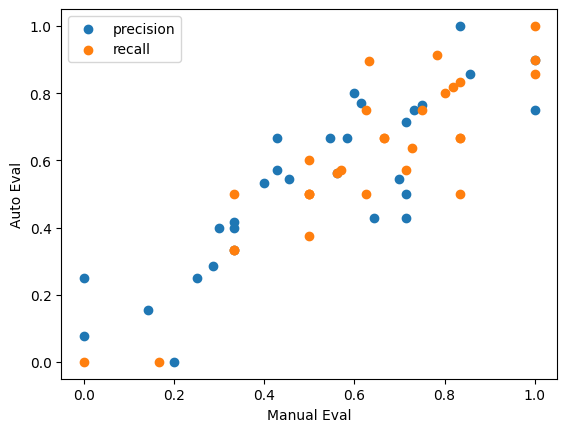

In [49]:
# Make plot
import matplotlib.pyplot as plt

plt.scatter(df_sample['manual_eval_precision'], df_sample['auto_eval_precision'], label='precision')
plt.scatter(df_sample['manual_eval_recall'], df_sample['auto_eval_recall'], label='recall')
plt.ylabel("Auto Eval")
plt.xlabel("Manual Eval")
plt.legend()
plt.show()

In [57]:
from scipy.stats import pearsonr, spearmanr
print("Pearson:", pearsonr(df_sample['manual_eval_precision'].values, df_sample['auto_eval_precision'].values))
print("Spearman:", spearmanr(df_sample['manual_eval_precision'].values, df_sample['auto_eval_precision'].values))

Pearson: PearsonRResult(statistic=0.8440290617234352, pvalue=4.632490750583216e-09)
Spearman: SignificanceResult(statistic=0.8499442797668006, pvalue=2.801845414763705e-09)


In [58]:
print("Pearson:", pearsonr(df_sample['manual_eval_recall'].values, df_sample['auto_eval_recall'].values))
print("Spearman:", spearmanr(df_sample['manual_eval_recall'].values, df_sample['auto_eval_recall'].values))

Pearson: PearsonRResult(statistic=0.8791939123617432, pvalue=1.6258714555000847e-10)
Spearman: SignificanceResult(statistic=0.815751456208439, pvalue=3.9660529367924555e-08)
